In [72]:
import denoise
import preprocess
import seq_model
import att_rnn_model

import os
import librosa
import IPython
import matplotlib.pyplot as plt
import numpy as np
from librosa import display
import tensorflow as tf
from keras.models import load_model
import audiosegment as aud
from sklearn.utils import shuffle
from matplotlib.pyplot import xlim, ylim
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [3]:
test_0 = '/home/anton/Documents/test/0/'
test_1 = '/home/anton/Documents/test/1/'
new_test_0 = '/home/anton/Documents/new_test/0/'
new_test_1 = '/home/anton/Documents/new_test/1/'

data_path_0 = '/home/anton/Documents/final_set/0/'
data_path_1 = '/home/anton/Documents/final_set/1/'

In [4]:
list_0 = os.listdir(data_path_0)
list_1 = os.listdir(data_path_1)

# Data for training 

### Class 0 

In [5]:
y, sr = librosa.load(data_path_0 + list_0[1], sr=16000)
print(list_0[1])
IPython.display.Audio(data=y, rate=sr)

121.wav


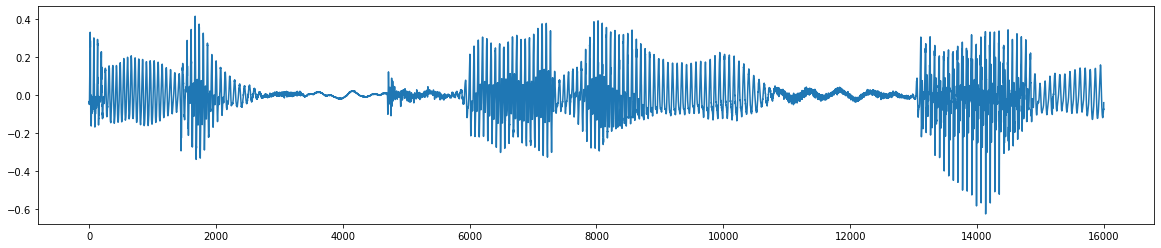

In [6]:
fig, ax = plt.subplots(figsize=(20,4))
ax.plot(y);

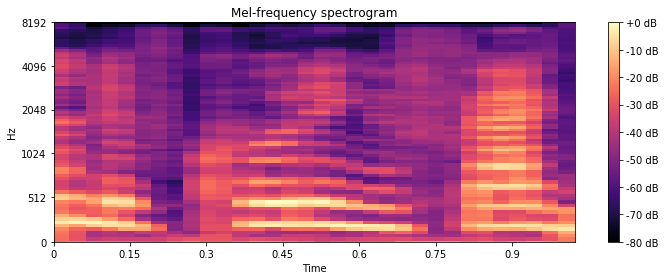

In [7]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=80, fmax=8192)
plt.figure(figsize=(10, 4))
S_dB = librosa.power_to_db(S, ref=np.max)
display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, fmax=8192)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()

In [8]:
y, sr = librosa.load(data_path_0 + list_0[7], sr=16000)
print(list_0[7])
IPython.display.Audio(data=y, rate=sr)

cleartwo749.wav


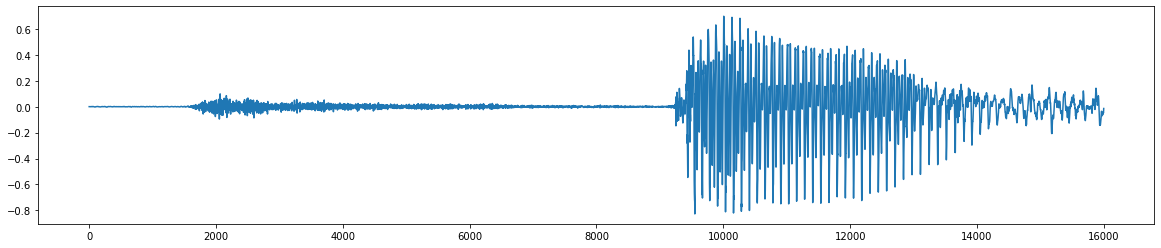

In [9]:
fig, ax = plt.subplots(figsize=(20,4))
ax.plot(y);

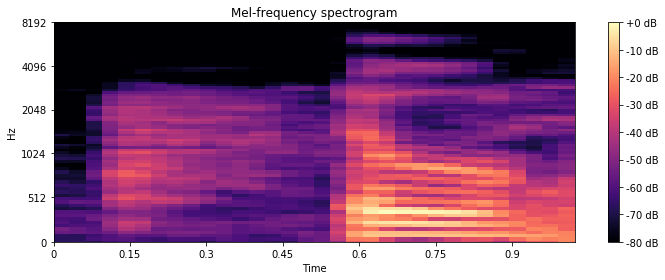

In [10]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=80, fmax=8192)
plt.figure(figsize=(10, 4))
S_dB = librosa.power_to_db(S, ref=np.max)
display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, fmax=8192)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()

### Class 1 

In [11]:
y, sr = librosa.load(data_path_1 + list_1[1], sr=16000)
print(list_1[1])
IPython.display.Audio(data=y, rate=sr)

1977cd85758f_nohash_0.wav


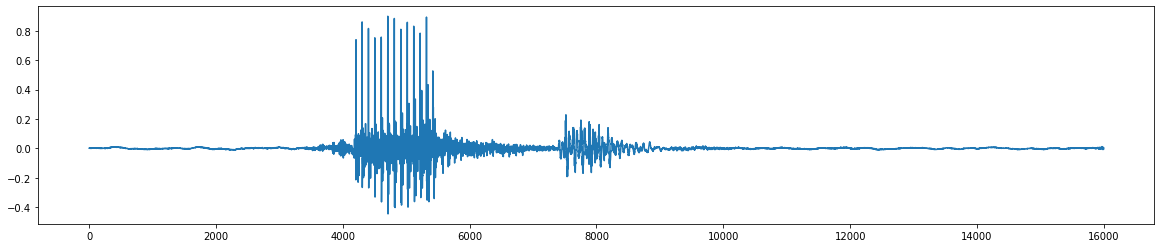

In [12]:
fig, ax = plt.subplots(figsize=(20,4))
ax.plot(y);

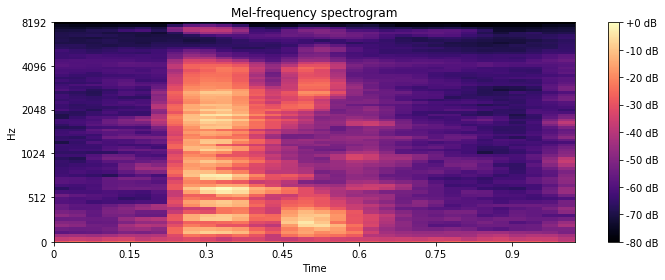

In [13]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=80, fmax=8192)
plt.figure(figsize=(10, 4))
S_dB = librosa.power_to_db(S, ref=np.max)
display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, fmax=8192)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()

In [14]:
y, sr = librosa.load(data_path_1 + list_1[2], sr=16000)
print(list_1[2])
IPython.display.Audio(data=y, rate=sr)

227da15e796_nohash_0.wav


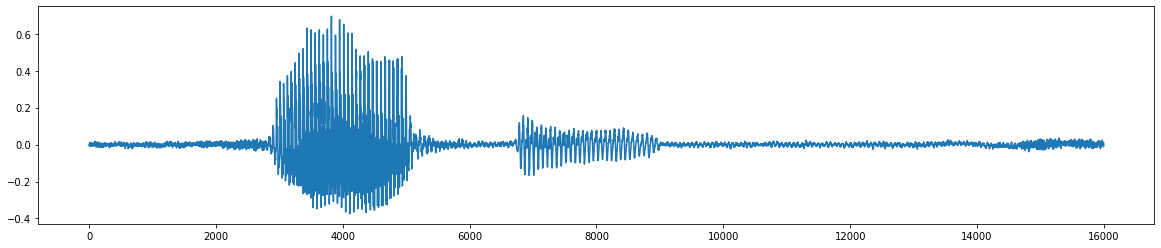

In [15]:
fig, ax = plt.subplots(figsize=(20,4))
ax.plot(y);

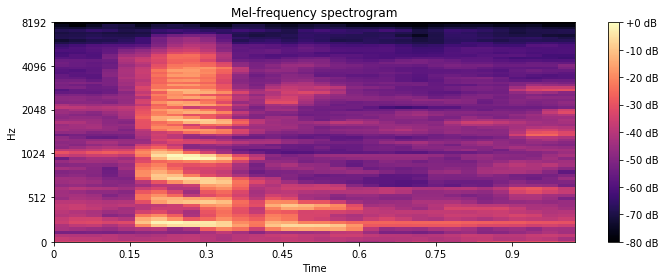

In [16]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=80, fmax=8192)
plt.figure(figsize=(10, 4))
S_dB = librosa.power_to_db(S, ref=np.max)
display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, fmax=8192)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()

# Denoise

### Input file 

In [17]:
y, sr = librosa.load(data_path_1 + list_1[5], sr=16000)
IPython.display.Audio(data=y, rate=sr)

### Plot of input file 

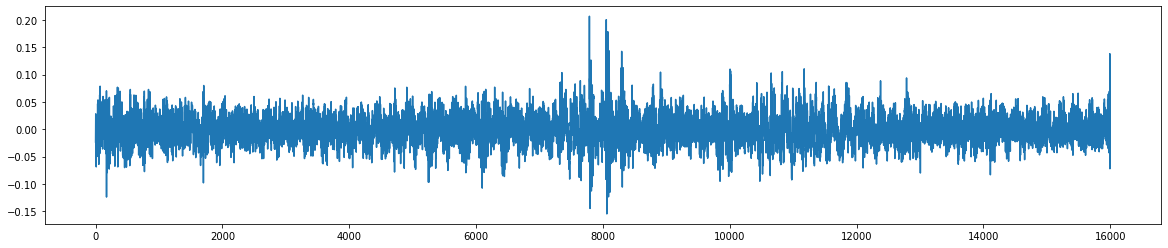

In [18]:
fig, ax = plt.subplots(figsize=(20,4))
ax.plot(y);

### Melspectrogram of input file 

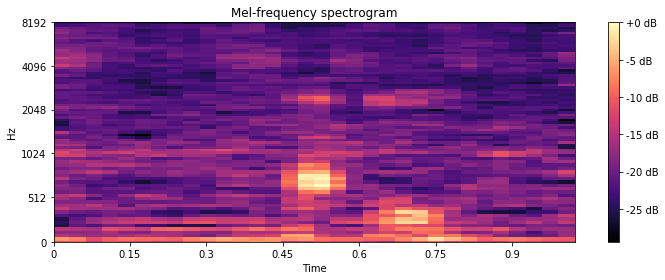

In [19]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=80, fmax=8192)
plt.figure(figsize=(10, 4))
S_dB = librosa.power_to_db(S, ref=np.max)
display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, fmax=8192)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()

### Denoising 

In [20]:
output = denoise.remove_noise(audio_clip=y, noise_clip=y, n_std_thresh=2, prop_decrease=0.95, visual=True)

### Denoised file 

In [21]:
IPython.display.Audio(data=output, rate=sr)

### Plot of denoised file 

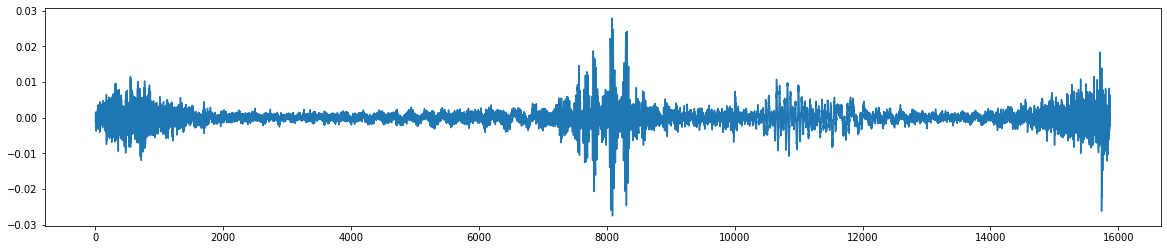

In [22]:
fig, ax = plt.subplots(figsize=(20,4))
ax.plot(output);

### Melspectrogram of denoised file 

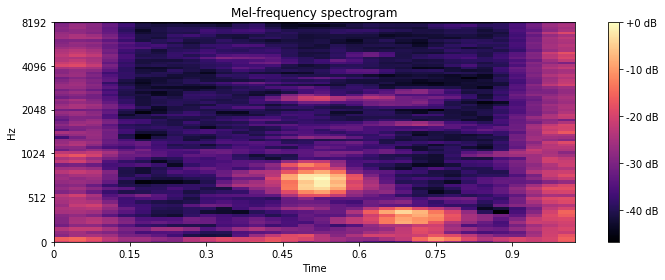

In [23]:
S = librosa.feature.melspectrogram(y=output, sr=sr, n_mels=80, fmax=8192)
plt.figure(figsize=(10, 4))
S_dB = librosa.power_to_db(S, ref=np.max)
display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, fmax=8192)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()

# Models

In [25]:
model_1 = seq_model.build()

In [26]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 23, 64)            26624     
_________________________________________________________________
dropout_8 (Dropout)          (None, 23, 64)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 23, 128)           98816     
_________________________________________________________________
dropout_9 (Dropout)          (None, 23, 128)           0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 23, 256)           394240    
_________________________________________________________________
dropout_10 (Dropout)         (None, 23, 256)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5888)             

In [57]:
model_2 = att_rnn_model.AttRNNSpeechModel(samplingrate = 16000, inputLength = None)

tracking <tf.Variable 'mel_stft_1/real_kernels:0' shape=(1024, 1, 1, 513) dtype=float32> dft_real_kernels
tracking <tf.Variable 'mel_stft_1/imag_kernels:0' shape=(1024, 1, 1, 513) dtype=float32> dft_imag_kernels
tracking <tf.Variable 'mel_stft_1/Variable:0' shape=(513, 80) dtype=float32> freq2mel


In [28]:
model_2.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 16000)        0                                            
__________________________________________________________________________________________________
reshape_1 (Reshape)             (None, 1, 16000)     0           input[0][0]                      
__________________________________________________________________________________________________
mel_stft (Melspectrogram)       (None, 80, 125, 1)   1091664     reshape_1[0][0]                  
__________________________________________________________________________________________________
normalization2d_1 (Normalizatio (None, 80, 125, 1)   0           mel_stft[0][0]                   
____________________________________________________________________________________________

# Testing 

### Loading weights 

In [30]:
model_1 = tf.keras.models.load_model('1.h5')

In [58]:
model_2.load_weights('weights_2.h5')

### Loading test data 

In [32]:
test_sounds = []
test_labels = []
label_file = []
test_names = []

In [33]:
for s in os.listdir(test_0):
    test_sounds.append(aud.from_file(test_0 + s).resample(sample_rate_Hz=16000, sample_width=2, channels=1))
    test_labels.append(0)
    label_file.append('o')
    test_names.append(s)

In [34]:
for s in os.listdir(test_1):
    test_sounds.append(aud.from_file(test_1 + s).resample(sample_rate_Hz=16000, sample_width=2, channels=1))
    test_labels.append(1)
    label_file.append('o')
    test_names.append(s)

In [35]:
for s in os.listdir(new_test_0):
    test_sounds.append(aud.from_file(new_test_0 + s).resample(sample_rate_Hz=16000, sample_width=2, channels=1))
    test_labels.append(0)
    label_file.append('n')
    test_names.append(s)

In [36]:
for s in os.listdir(new_test_1):
    test_sounds.append(aud.from_file(new_test_1 + s).resample(sample_rate_Hz=16000, sample_width=2, channels=1))
    test_labels.append(1)
    label_file.append('n')
    test_names.append(s)

In [37]:
test_sounds, test_labels, label_file, test_names = shuffle(test_sounds, test_labels, label_file, test_names, random_state=0)

In [38]:
names = []
borders = []
f = open('labels.txt')
lines = f.readlines()
for line in lines:
    line_list = line.split(' ')
    names.append(line_list[0])
    borders.append([line_list[1], line_list[2][:-1]])
border_dict = dict(zip(names, borders))
f.close()

In [39]:
new_names = []
new_borders = []
f = open('new_labels.txt')
lines = f.readlines()
for line in lines:
    line_list = line.split(' ')
    new_names.append(line_list[0])
    new_borders.append([line_list[1], line_list[2][:-1]])
new_border_dict = dict(zip(new_names, new_borders))
f.close()

In [73]:
def audiosegment_to_ndarray(audiosegment):
    audio_signal = audiosegment.get_array_of_samples()
    audio_signal = librosa.util.buf_to_float(audio_signal,n_bytes=2,
                                      dtype=np.float32)
    denoise_sound = denoise.remove_noise(audio_clip=audio_signal, noise_clip=audio_signal, n_std_thresh=2, prop_decrease=0.95, visual=True)
    features = preprocess.load_and_process(denoise_sound)
    return features

In [74]:
def audiosegment_to_ndarray2(audiosegment):
    data = audiosegment.get_array_of_samples()
    data = librosa.util.buf_to_float(data,n_bytes=2,
                                      dtype=np.float32)
    data = denoise.remove_noise(audio_clip=data, noise_clip=data, n_std_thresh=2, prop_decrease=0.95, visual=True)
    return data

In [75]:
def make_pred(arr):
    count = 0
    for i in arr:
        if i > 0.7:
            count += 1
        if count == 200:
            return 1
    return 0

In [76]:
def fill_array(arr, prob, start, length=1000):
    for i in range(50):
        arr[start + length - i - 1] = prob
    for i in range(950):
        arr[start + i] = (arr[start + i] + prob) / 2 if arr[start + i] != 0 else prob

### Prediction for model 1 

0
3613.wav
class - 1


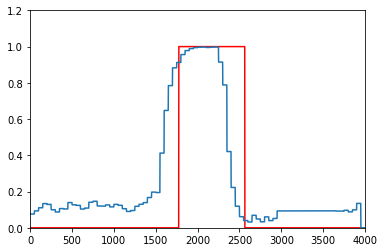

1
1992.wav
class - 1


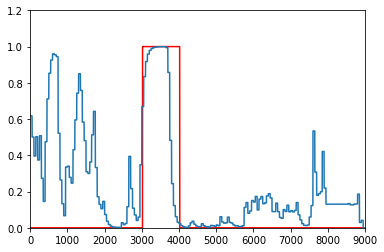

2
2035.wav
class - 1


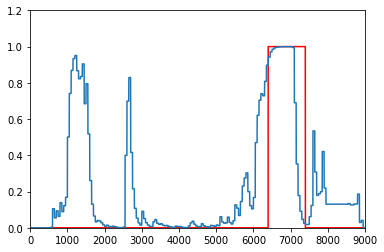

3
1973.wav
class - 0


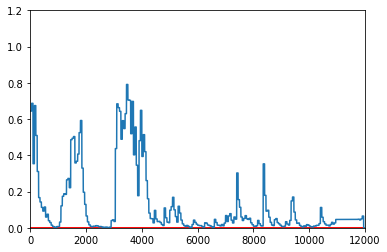

4
2922.wav
class - 0


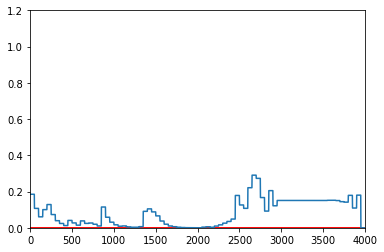

5
2007.wav
class - 1


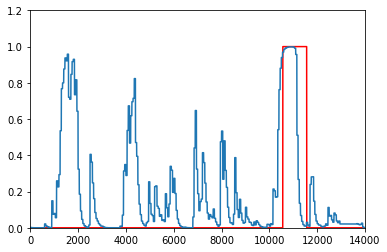

6
2939.wav
class - 0


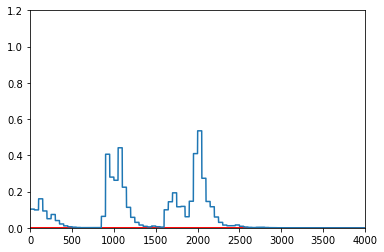

7
2950.wav
class - 0


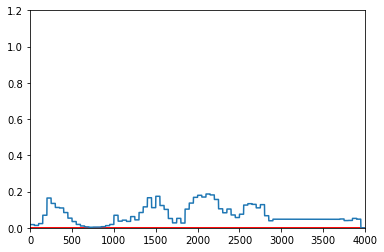

8
3665.wav
class - 1


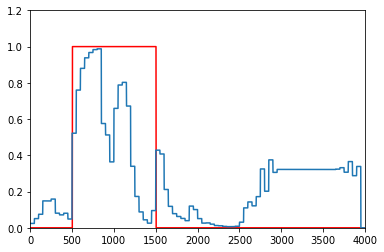

9
3499.wav
class - 1


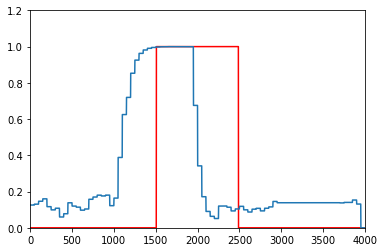

10
2014.wav
class - 1


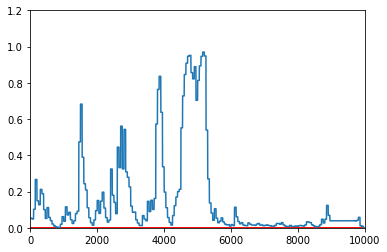

11
2871.wav
class - 0


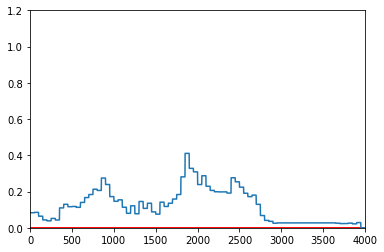

12
2925.wav
class - 0


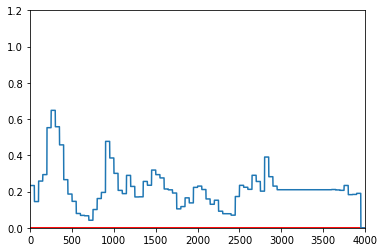

13
3385.wav
class - 1


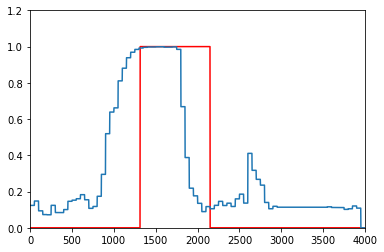

14
3526.wav
class - 1


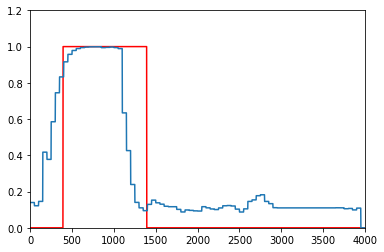

15
3456.wav
class - 1


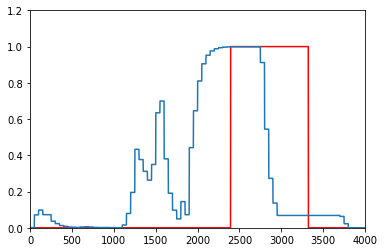

16
2913.wav
class - 0


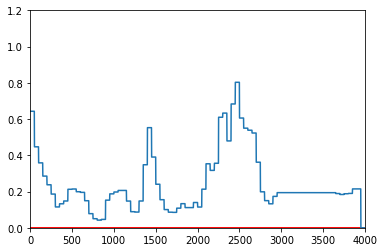

17
2001.wav
class - 0


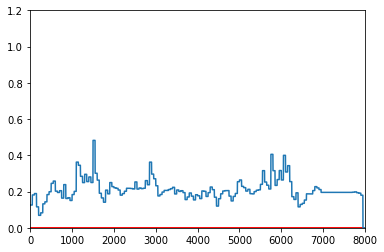

18
3457.wav
class - 1


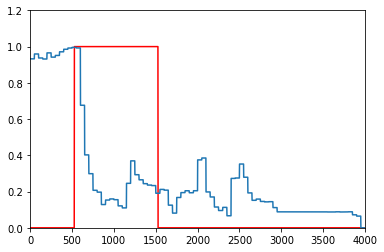

19
2992.wav
class - 0


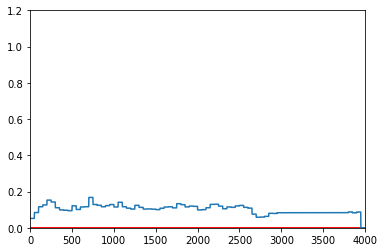

20
2862.wav
class - 0


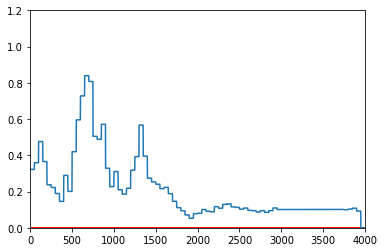

21
2902.wav
class - 0


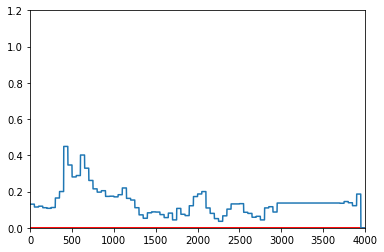

22
2903.wav
class - 0


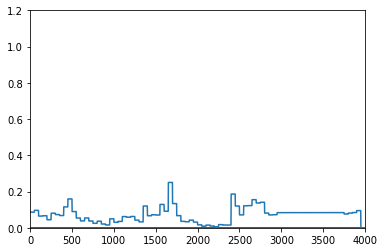

23
2878.wav
class - 0


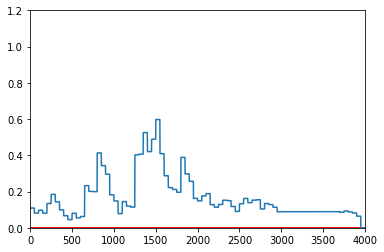

24
2004.wav
class - 0


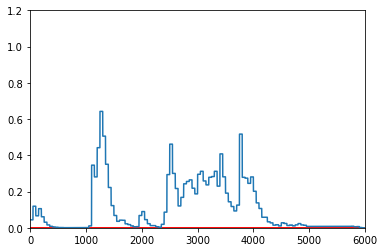

25
3434.wav
class - 1


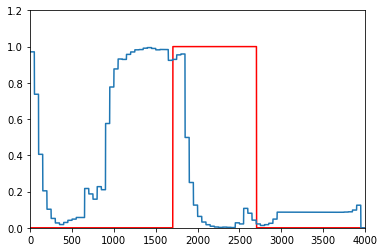

26
3399.wav
class - 1


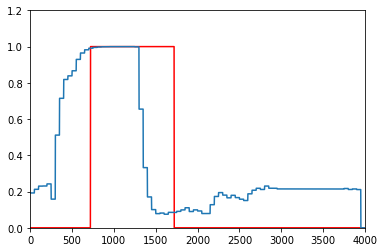

27
3543.wav
class - 1


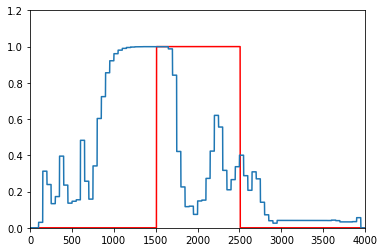

28
2051.wav
class - 0


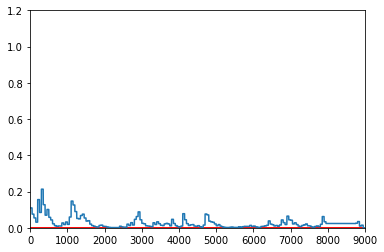

29
3473.wav
class - 1


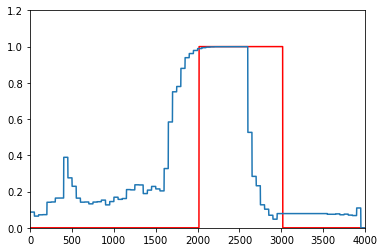

30
3655.wav
class - 1


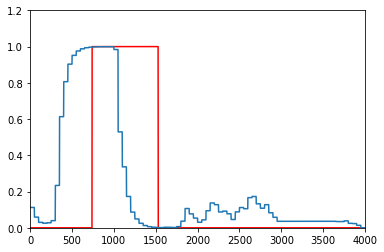

31
3418.wav
class - 1


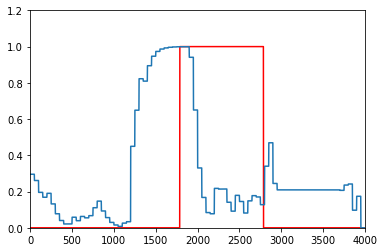

32
3558.wav
class - 1


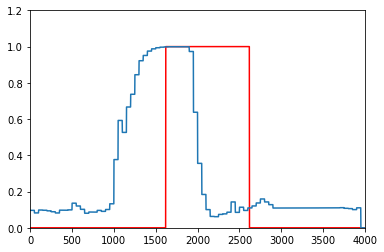

33
2900.wav
class - 0


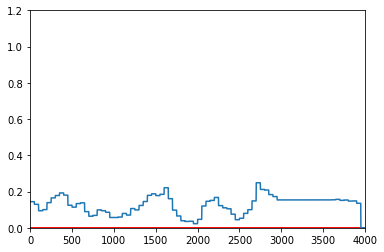

34
3401.wav
class - 1


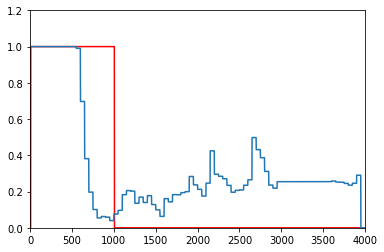

35
2797.wav
class - 1


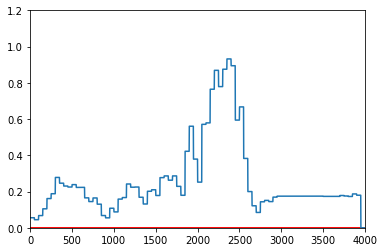

36
3420.wav
class - 1


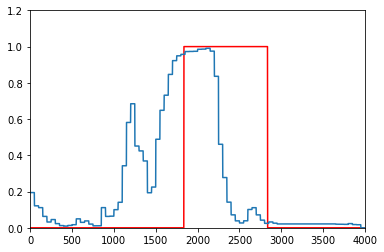

37
1935.wav
class - 0


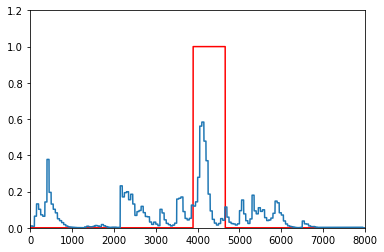

38
2964.wav
class - 1


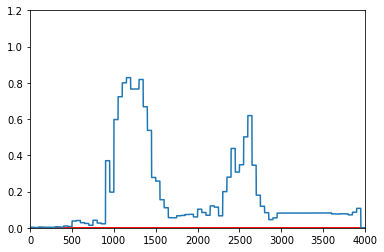

39
2025.wav
class - 0


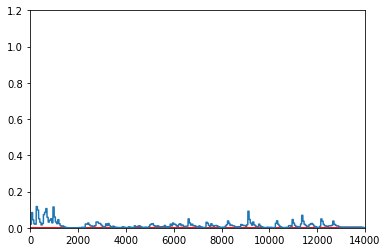

40
3415.wav
class - 1


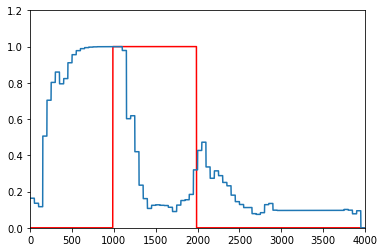

41
2969.wav
class - 0


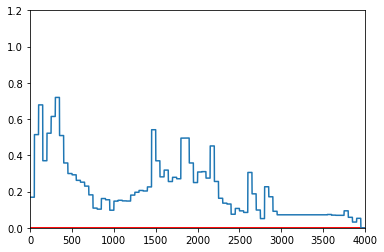

42
2852.wav
class - 0


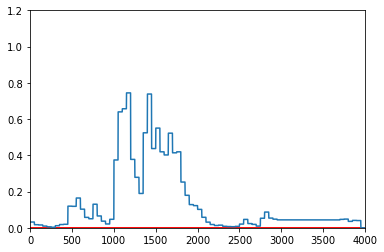

43
1924.wav
class - 1


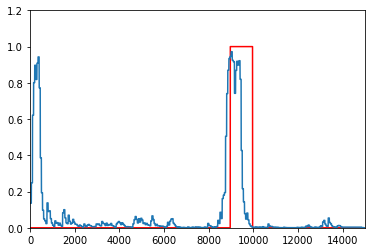

44
1991.wav
class - 1


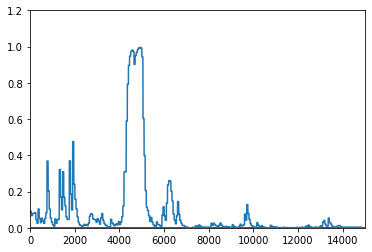

45
2011.wav
class - 1


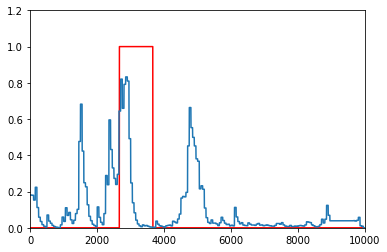

46
2809.wav
class - 0


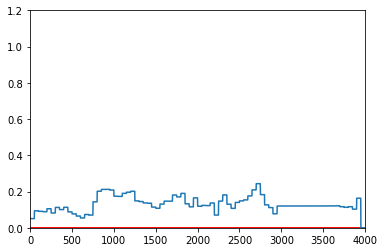

47
2810.wav
class - 0


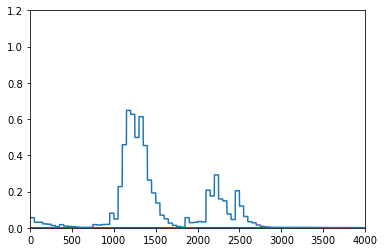

48
2016.wav
class - 0


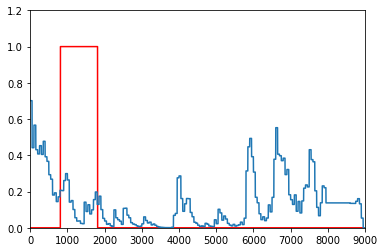

49
1928.wav
class - 1


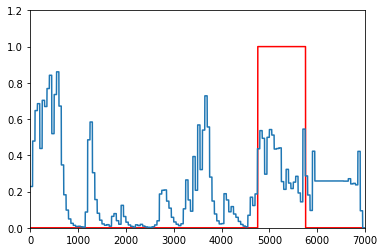

50
3437.wav
class - 1


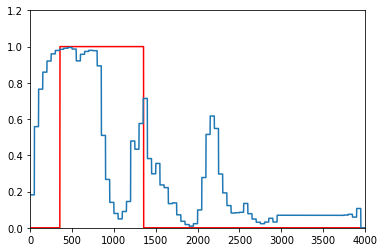

51
2014.wav
class - 1


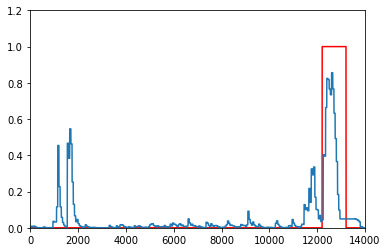

52
2019.wav
class - 1


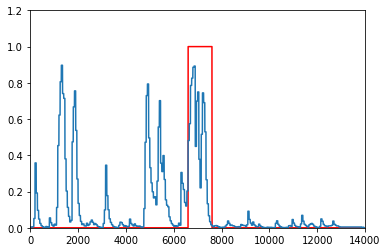

53
1993.wav
class - 1


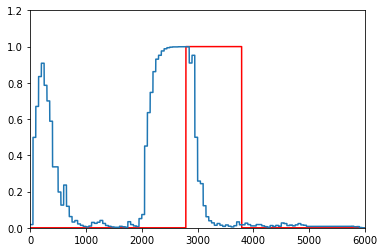

54
3597.wav
class - 1


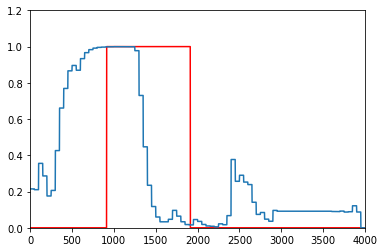

55
2030.wav
class - 0


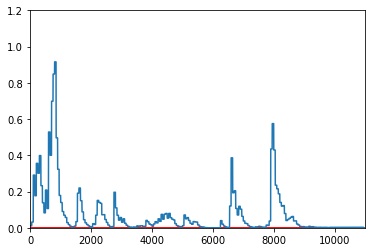

56
2010.wav
class - 0


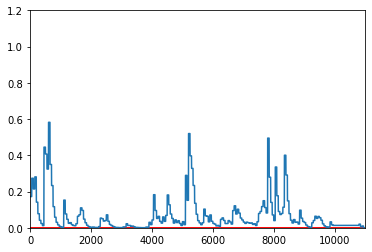

57
2967.wav
class - 0


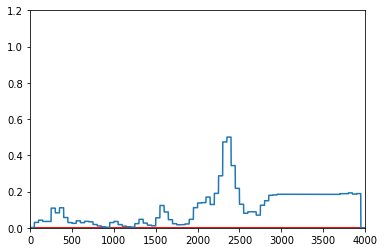

58
3516.wav
class - 1


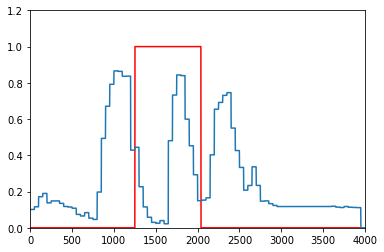

59
2050.wav
class - 0


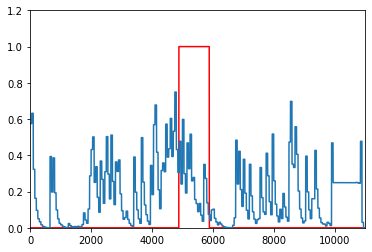

60
3622.wav
class - 1


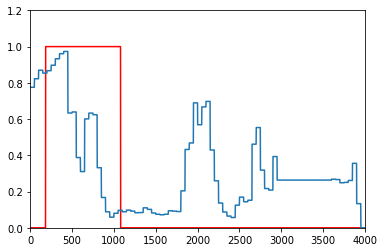

61
3603.wav
class - 1


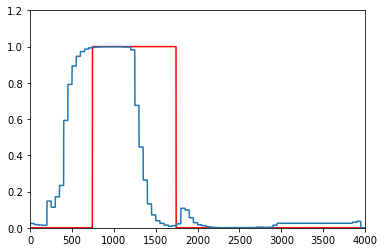

62
3396.wav
class - 1


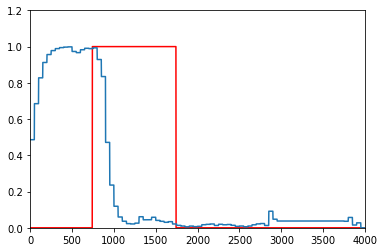

63
2933.wav
class - 0


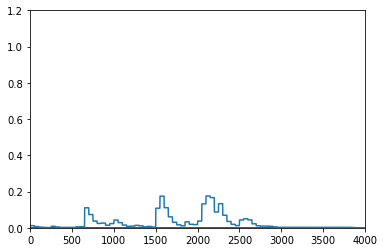

64
3364.wav
class - 1


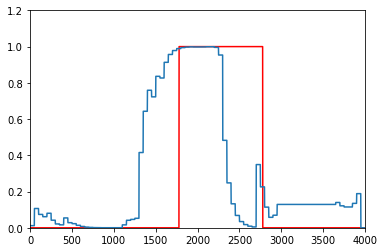

65
2942.wav
class - 0


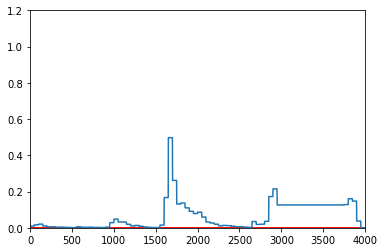

66
3535.wav
class - 1


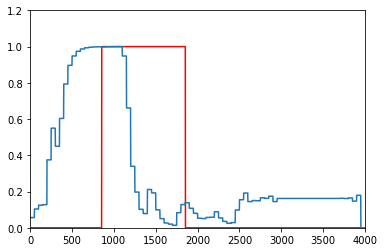

67
3639.wav
class - 0


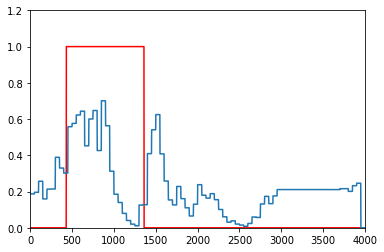

68
2983.wav
class - 0


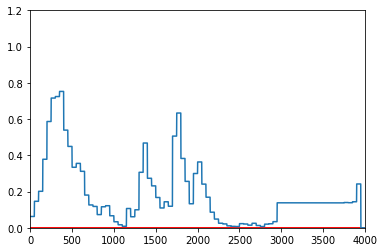

69
2882.wav
class - 1


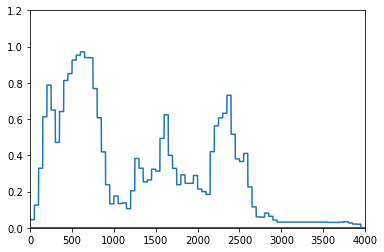

70
3640.wav
class - 1


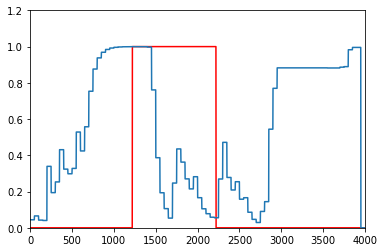

71
2876.wav
class - 1


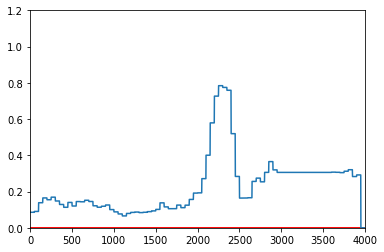

72
3584.wav
class - 1


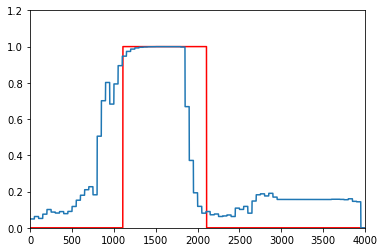

73
2965.wav
class - 0


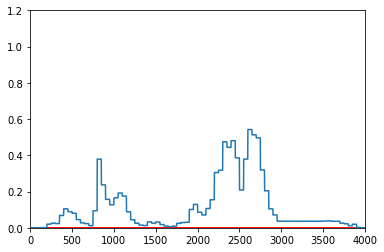

74
3466.wav
class - 1


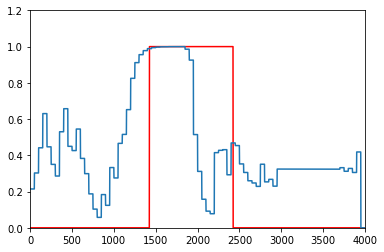

75
3607.wav
class - 1


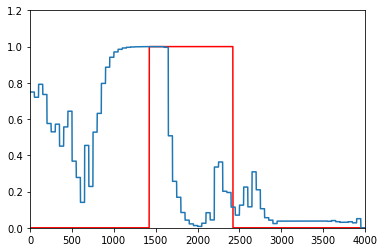

76
2921.wav
class - 1


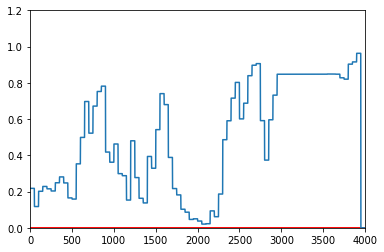

77
2885.wav
class - 0


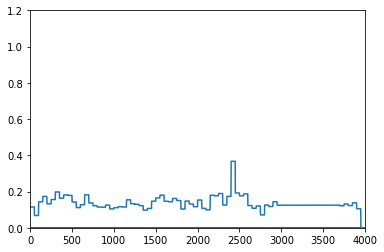

78
2838.wav
class - 0


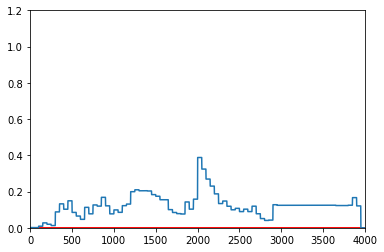

79
3616.wav
class - 1


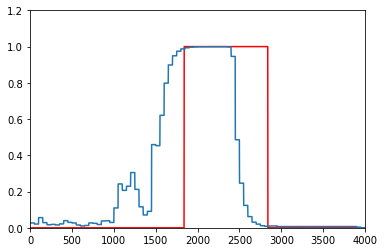

80
3608.wav
class - 1


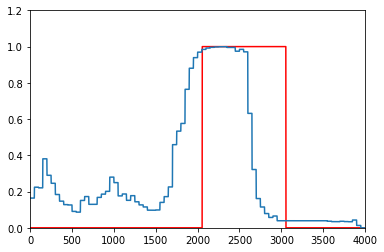

81
1962.wav
class - 1


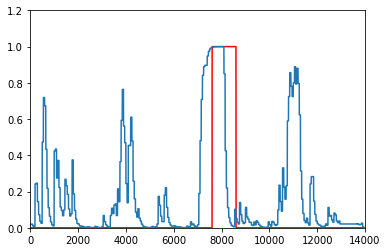

82
1990.wav
class - 0


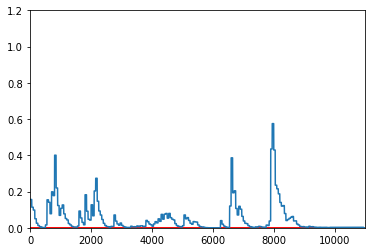

83
2919.wav
class - 1


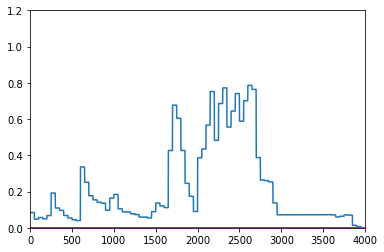

84
3384.wav
class - 1


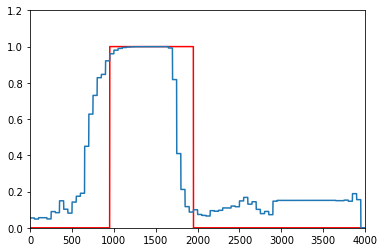

85
2954.wav
class - 1


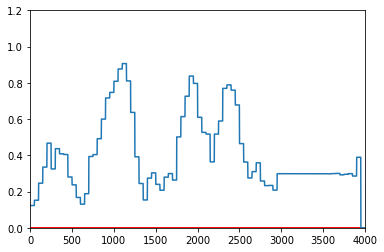

86
3423.wav
class - 0


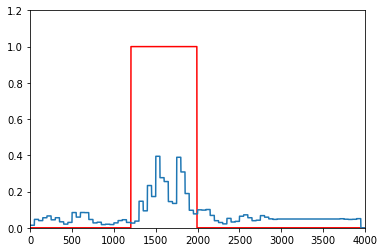

87
1989.wav
class - 1


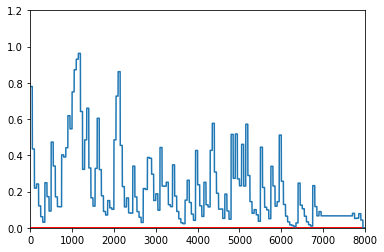

88
3562.wav
class - 1


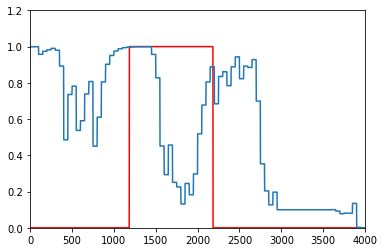

89
3588.wav
class - 1


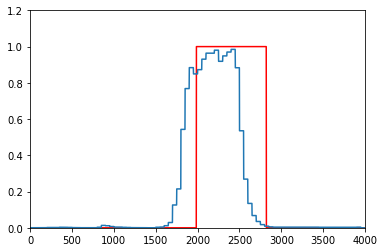

90
3505.wav
class - 1


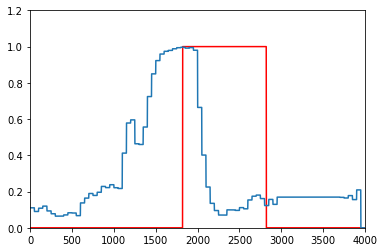

91
1943.wav
class - 1


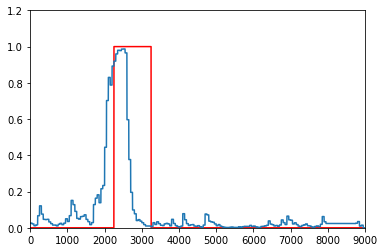

92
2053.wav
class - 1


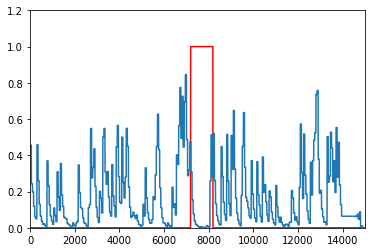

93
2033.wav
class - 0


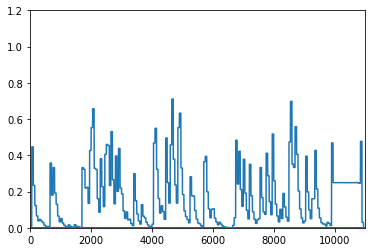

94
3432.wav
class - 1


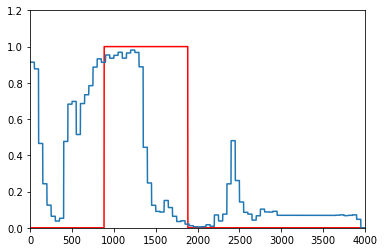

95
3394.wav
class - 1


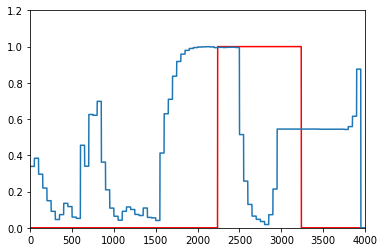

96
3626.wav
class - 1


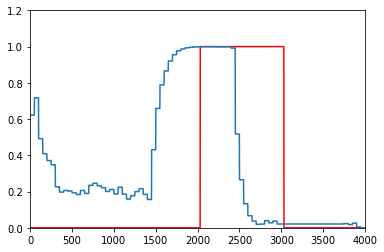

97
2840.wav
class - 0


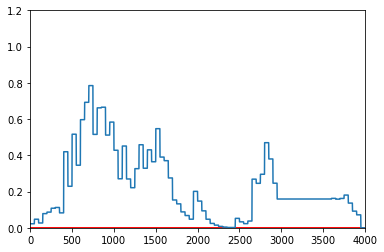

98
2003.wav
class - 0


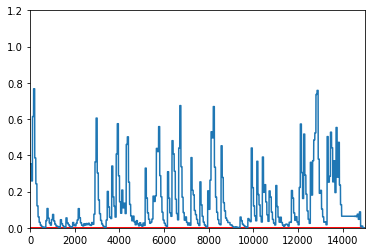

99
3657.wav
class - 1


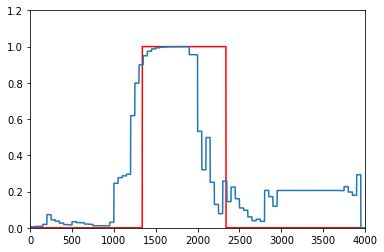

In [77]:
pr = []
for i, s in enumerate(test_sounds[:100]):
    real_values = []
    predicted_values = np.zeros((len(s),))
    predicted_values = predicted_values.tolist()
    if test_labels[i] == 0:
        real_values = [0 for k in range(len(s))]
        for j in range(0, len(s) - 1000, 50):
            sound = audiosegment_to_ndarray(s[j:j+1000])
            sound = np.expand_dims(sound, axis=0)
            pr_val = model_1.predict_proba(sound)[0]
            fill_array(predicted_values, pr_val, j)
    else:
        start = 0
        end = 0
        if label_file[i] == 'o':
            start = border_dict[test_names[i]][0]
            end = border_dict[test_names[i]][1]
        else:
            start = new_border_dict[test_names[i]][0]
            end = new_border_dict[test_names[i]][1]
        real_values = [0 for k in range(len(s))]
        for k in range(int(start), int(end)):
            real_values[k] = 1
        for j in range(0, len(s) - 1000, 50):
            sound = audiosegment_to_ndarray(s[j:j+1000])
            sound = np.expand_dims(sound, axis=0)
            pr_val = model_1.predict_proba(sound)[0]
            fill_array(predicted_values, pr_val, j)
    print(i)
    print(test_names[i])
    pr.append(make_pred(predicted_values))
    print('class - ' + str(pr[i]))
    xlim((0, len(predicted_values)))
    ylim(0, 1.2)
    plt.plot(real_values, color='red')
    plt.plot(predicted_values)
    plt.show()

In [78]:
accuracy_score(pr, test_labels[:100])

0.85

In [79]:
f1_score(pr, test_labels[:100])

0.8717948717948717

In [80]:
confusion_matrix(pr, test_labels[:100])

array([[34,  5],
       [10, 51]])

### Prediction for model 2 

0
3613.wav
class - 1


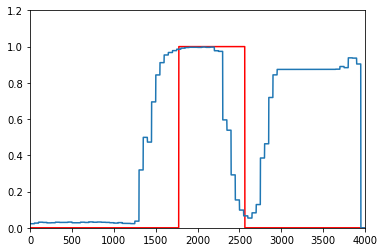

1
1992.wav
class - 1


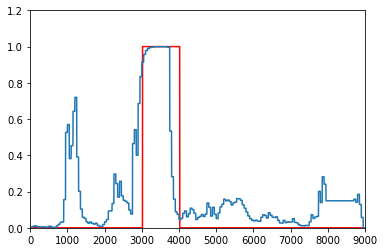

2
2035.wav
class - 1


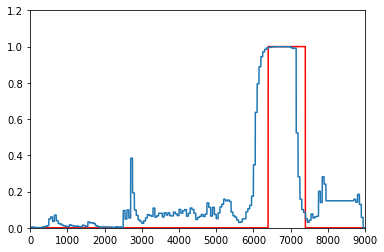

3
1973.wav
class - 0


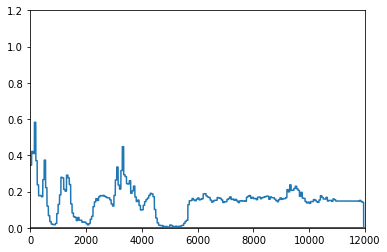

4
2922.wav
class - 0


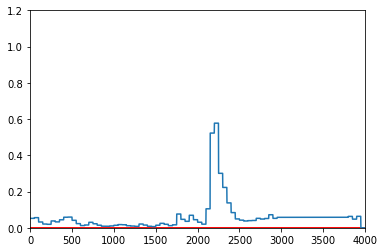

5
2007.wav
class - 1


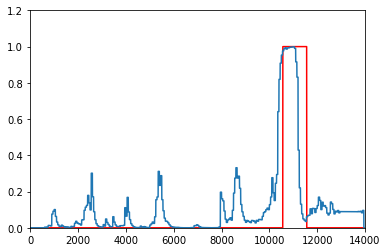

6
2939.wav
class - 0


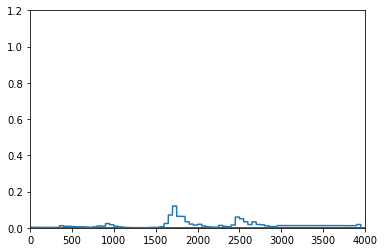

7
2950.wav
class - 0


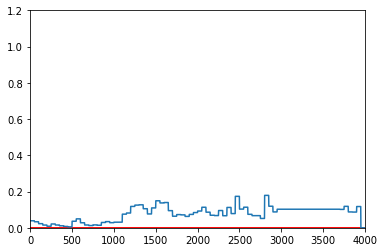

8
3665.wav
class - 1


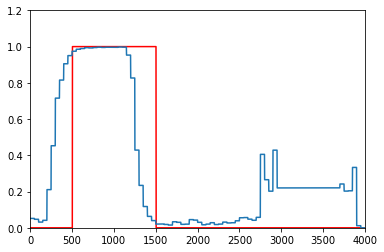

9
3499.wav
class - 1


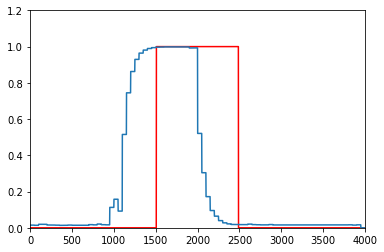

10
2014.wav
class - 1


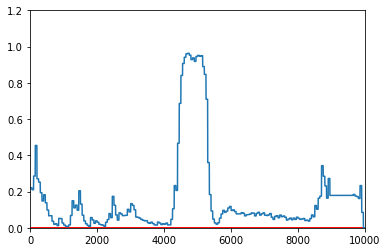

11
2871.wav
class - 0


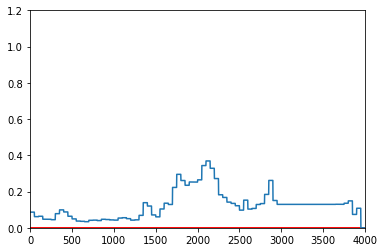

12
2925.wav
class - 0


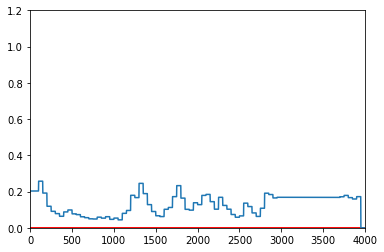

13
3385.wav
class - 1


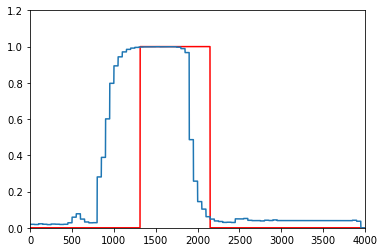

14
3526.wav
class - 1


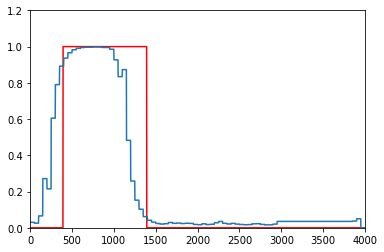

15
3456.wav
class - 1


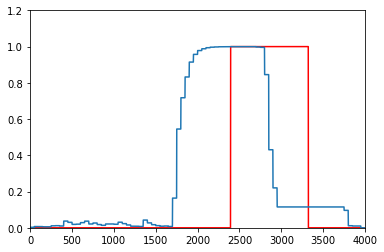

16
2913.wav
class - 0


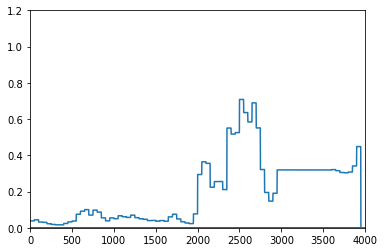

17
2001.wav
class - 0


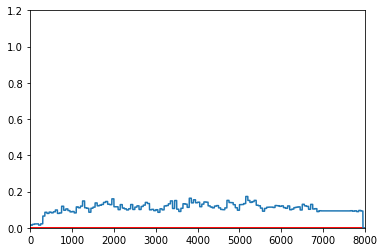

18
3457.wav
class - 1


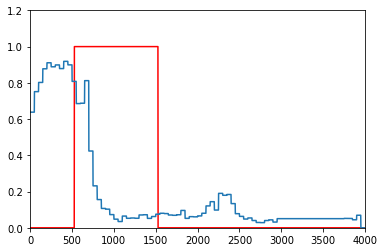

19
2992.wav
class - 0


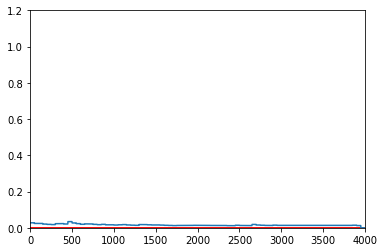

20
2862.wav
class - 0


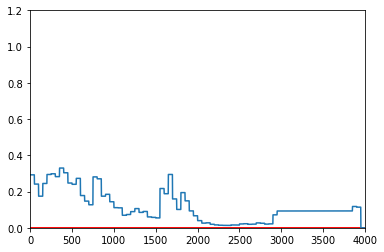

21
2902.wav
class - 0


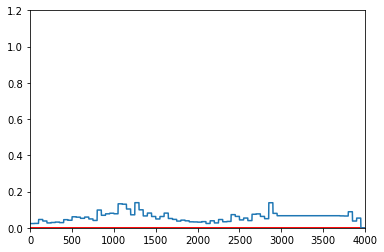

22
2903.wav
class - 0


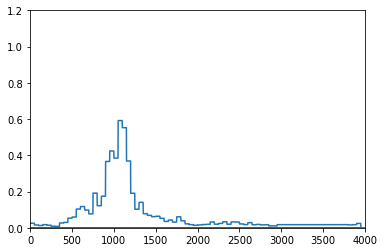

23
2878.wav
class - 0


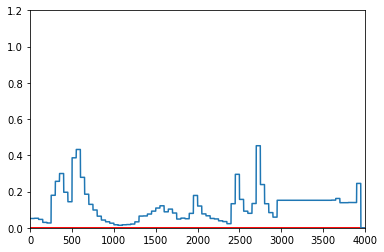

24
2004.wav
class - 0


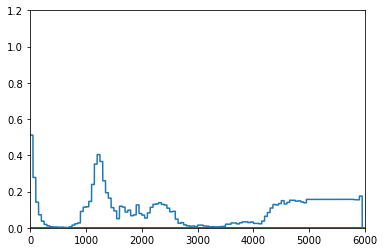

25
3434.wav
class - 1


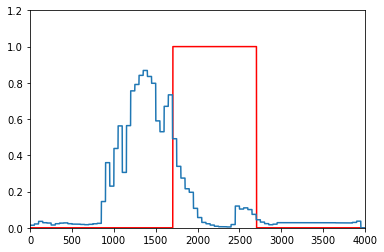

26
3399.wav
class - 1


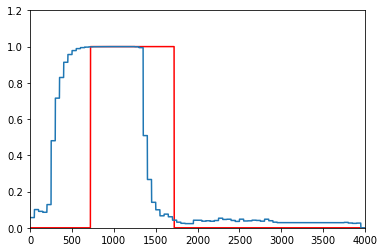

27
3543.wav
class - 1


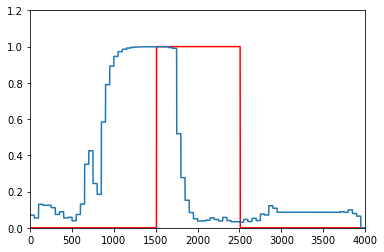

28
2051.wav
class - 0


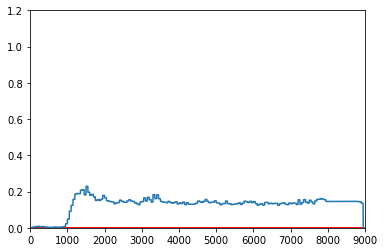

29
3473.wav
class - 1


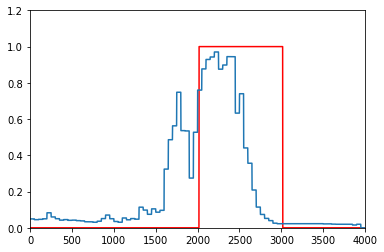

30
3655.wav
class - 1


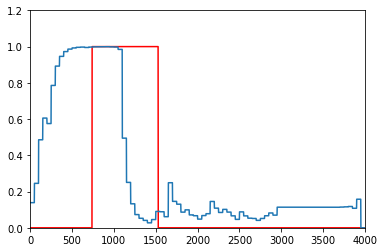

31
3418.wav
class - 1


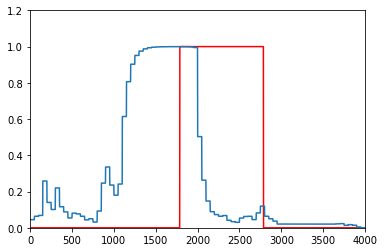

32
3558.wav
class - 1


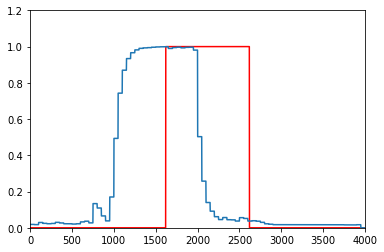

33
2900.wav
class - 0


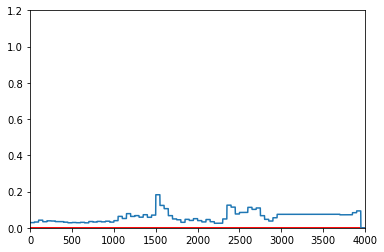

34
3401.wav
class - 1


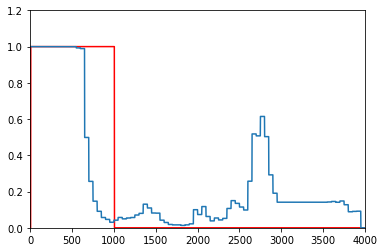

35
2797.wav
class - 0


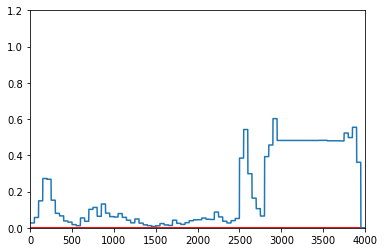

36
3420.wav
class - 1


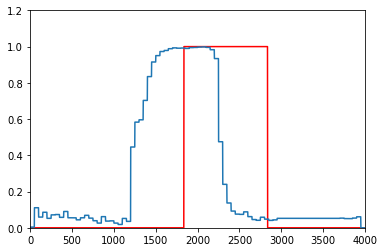

37
1935.wav
class - 0


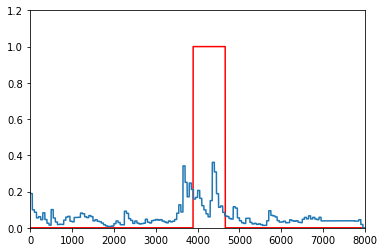

38
2964.wav
class - 0


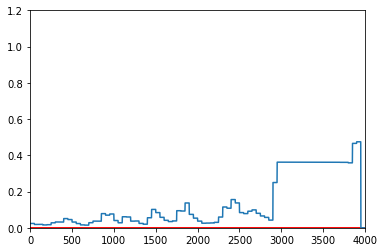

39
2025.wav
class - 0


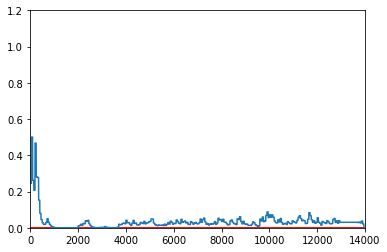

40
3415.wav
class - 1


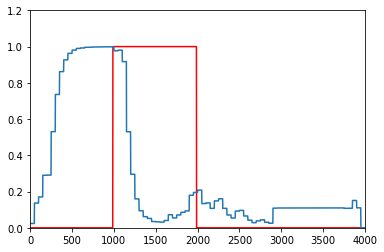

41
2969.wav
class - 0


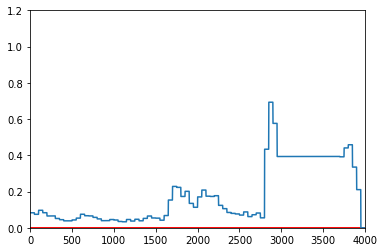

42
2852.wav
class - 0


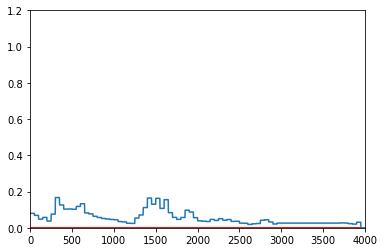

43
1924.wav
class - 1


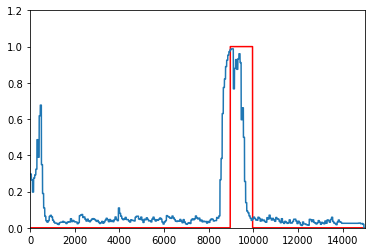

44
1991.wav
class - 0


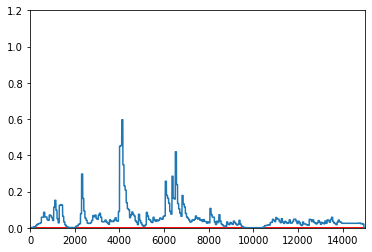

45
2011.wav
class - 1


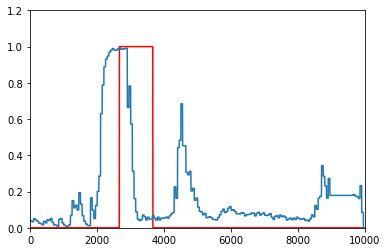

46
2809.wav
class - 0


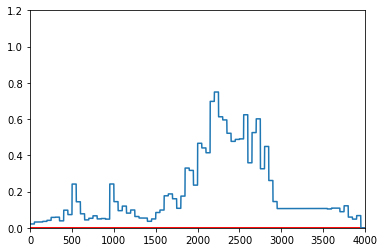

47
2810.wav
class - 0


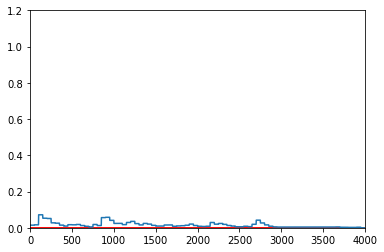

48
2016.wav
class - 0


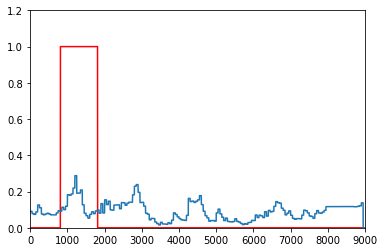

49
1928.wav
class - 1


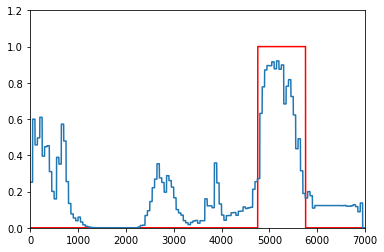

50
3437.wav
class - 1


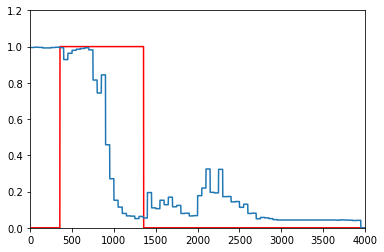

51
2014.wav
class - 1


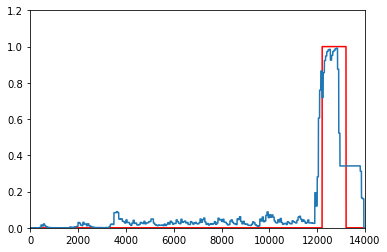

52
2019.wav
class - 1


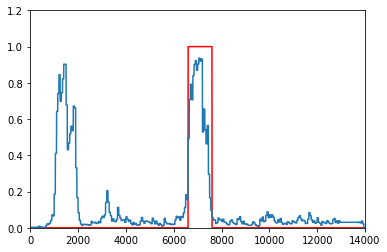

53
1993.wav
class - 1


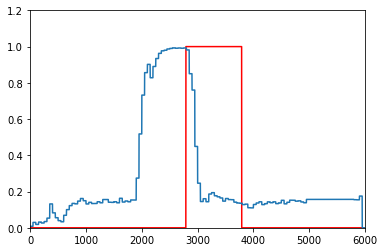

54
3597.wav
class - 1


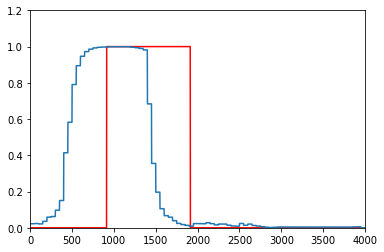

55
2030.wav
class - 1


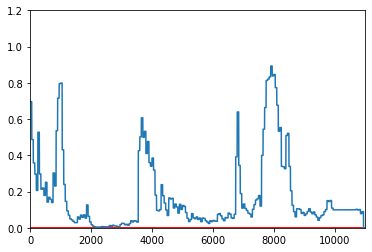

56
2010.wav
class - 0


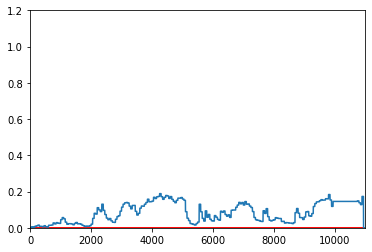

57
2967.wav
class - 0


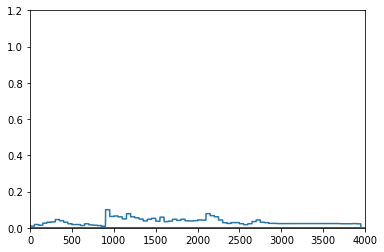

58
3516.wav
class - 1


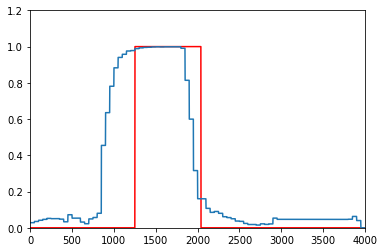

59
2050.wav
class - 0


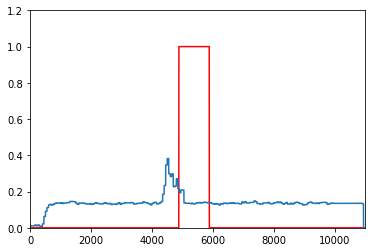

60
3622.wav
class - 1


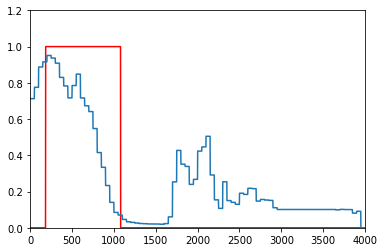

61
3603.wav
class - 1


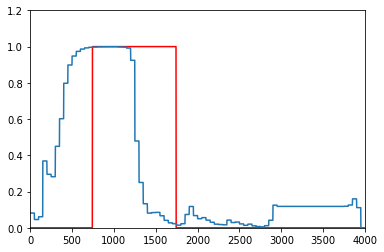

62
3396.wav
class - 1


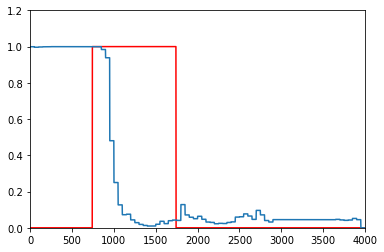

63
2933.wav
class - 0


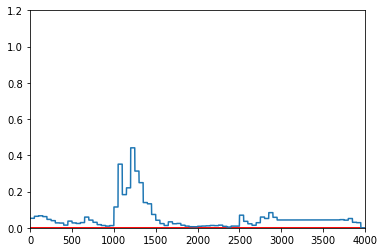

64
3364.wav
class - 1


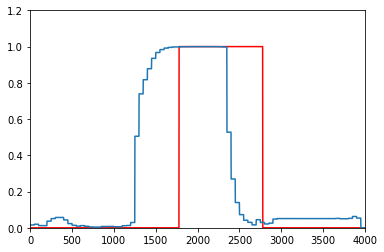

65
2942.wav
class - 0


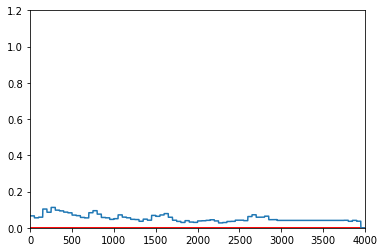

66
3535.wav
class - 1


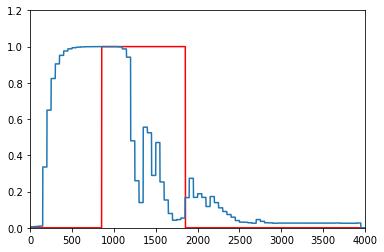

67
3639.wav
class - 0


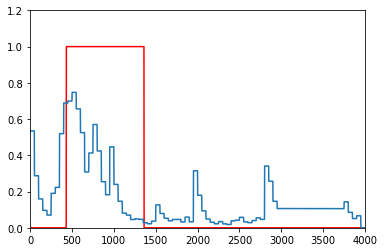

68
2983.wav
class - 0


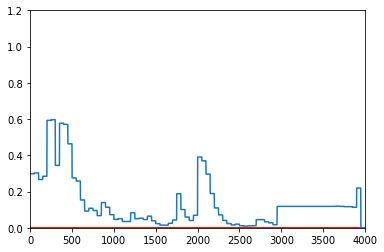

69
2882.wav
class - 0


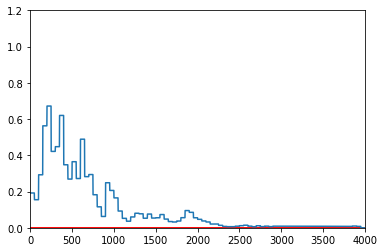

70
3640.wav
class - 1


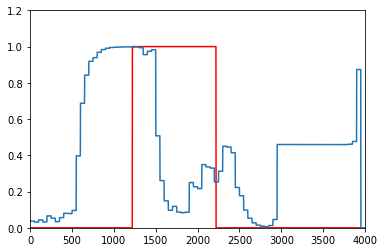

71
2876.wav
class - 0


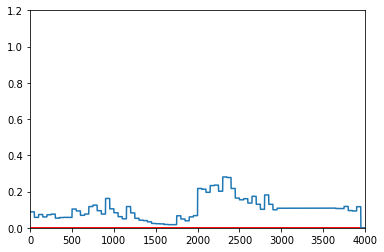

72
3584.wav
class - 1


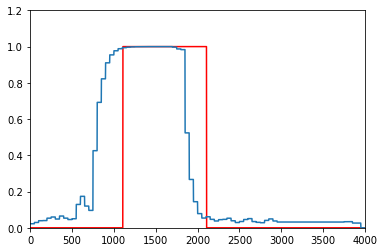

73
2965.wav
class - 0


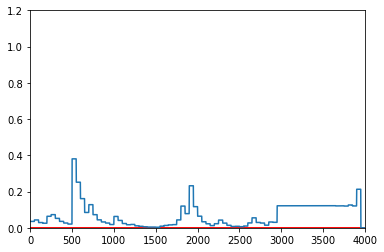

74
3466.wav
class - 1


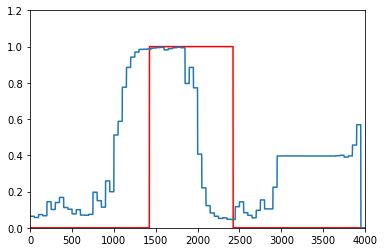

75
3607.wav
class - 1


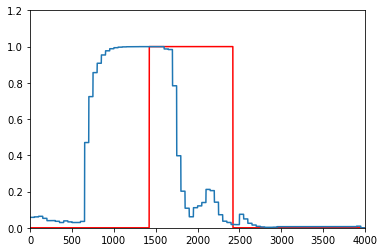

76
2921.wav
class - 0


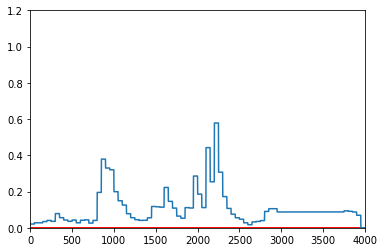

77
2885.wav
class - 0


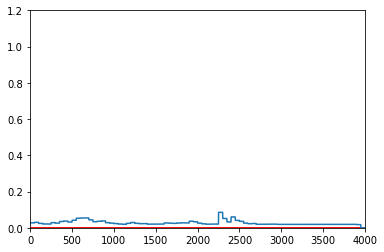

78
2838.wav
class - 0


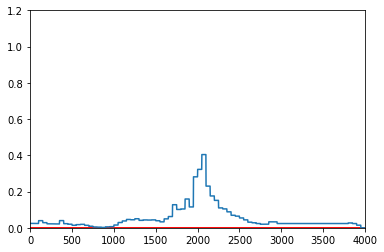

79
3616.wav
class - 1


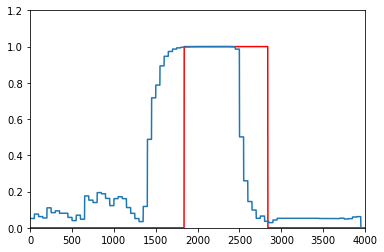

80
3608.wav
class - 1


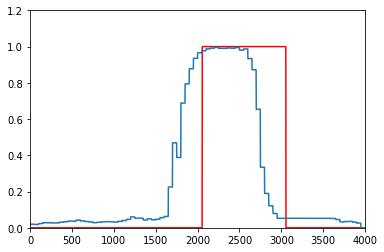

81
1962.wav
class - 1


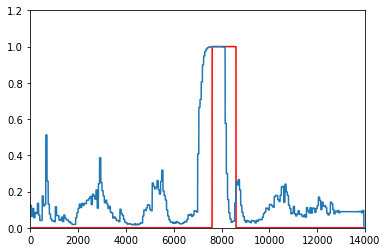

82
1990.wav
class - 1


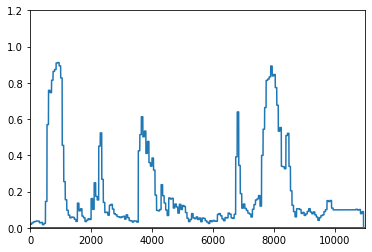

83
2919.wav
class - 0


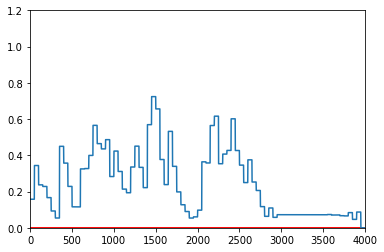

84
3384.wav
class - 1


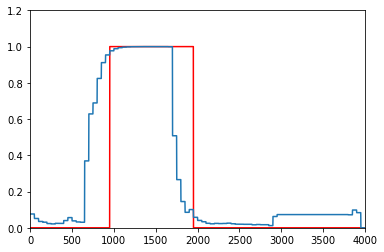

85
2954.wav
class - 0


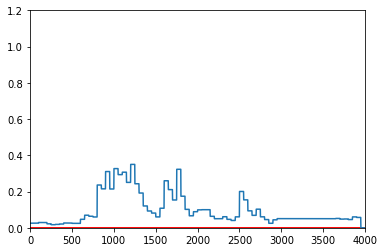

86
3423.wav
class - 0


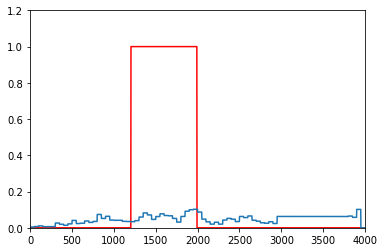

87
1989.wav
class - 0


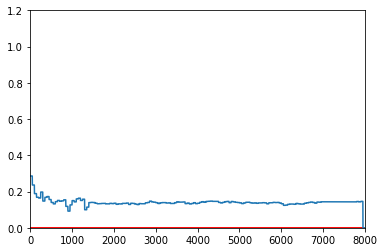

88
3562.wav
class - 1


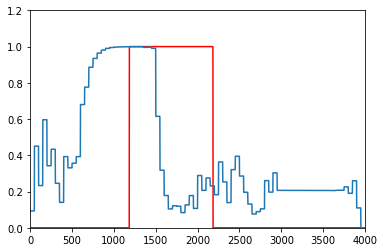

89
3588.wav
class - 1


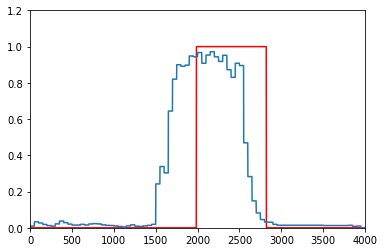

90
3505.wav
class - 1


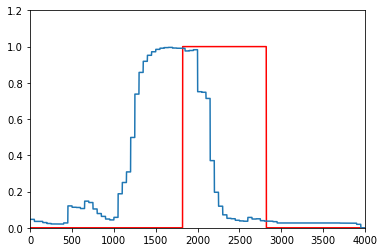

91
1943.wav
class - 1


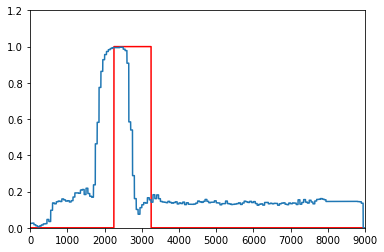

92
2053.wav
class - 0


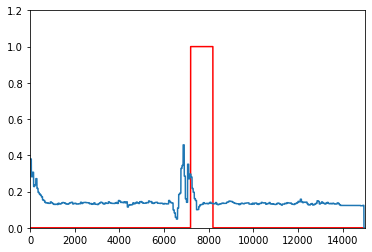

93
2033.wav
class - 0


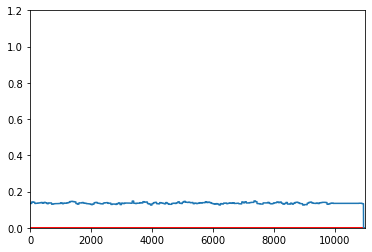

94
3432.wav
class - 1


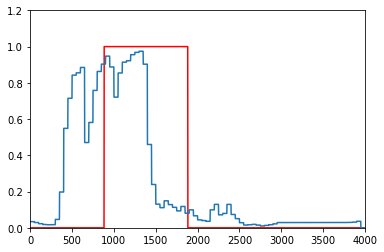

95
3394.wav
class - 1


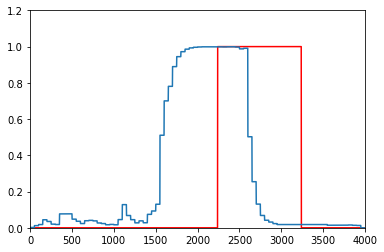

96
3626.wav
class - 1


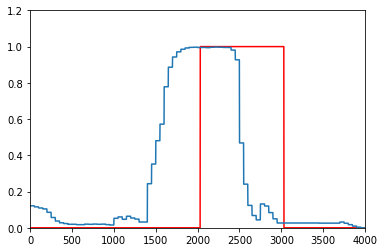

97
2840.wav
class - 0


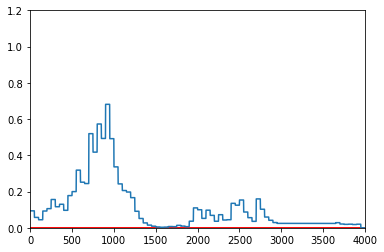

98
2003.wav
class - 0


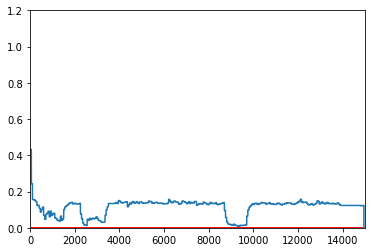

99
3657.wav
class - 1


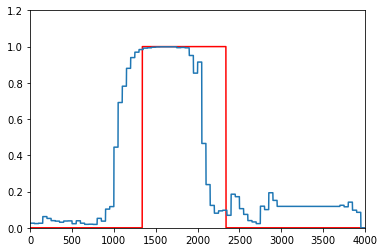

In [81]:
pr = []
for i, s in enumerate(test_sounds[:100]):
    real_values = []
    predicted_values = np.zeros((len(s),))
    predicted_values = predicted_values.tolist()
    if test_labels[i] == 0:
        real_values = [0 for k in range(len(s))]
        for j in range(0, len(s) - 1000, 50):
            sound = audiosegment_to_ndarray2(s[j:j+1000])
            sound = np.expand_dims(sound, axis=0)
            pr_val = model_2.predict(sound)[0]
            fill_array(predicted_values, pr_val, j)
    else:
        start = 0
        end = 0
        if label_file[i] == 'o':
            start = border_dict[test_names[i]][0]
            end = border_dict[test_names[i]][1]
        else:
            start = new_border_dict[test_names[i]][0]
            end = new_border_dict[test_names[i]][1]
        real_values = [0 for k in range(len(s))]
        for k in range(int(start), int(end)):
            real_values[k] = 1
        for j in range(0, len(s) - 1000, 50):
            sound = audiosegment_to_ndarray2(s[j:j+1000])
            sound = np.expand_dims(sound, axis=0)
            pr_val = model_2.predict(sound)[0]
            fill_array(predicted_values, pr_val, j)
    print(i)
    print(test_names[i])
    pr.append(make_pred(predicted_values))
    print('class - ' + str(pr[i]))
    xlim((0, len(predicted_values)))
    ylim(0, 1.2)
    plt.plot(real_values, color='red')
    plt.plot(predicted_values)
    plt.show()

In [82]:
accuracy_score(pr, test_labels[:100])

0.91

In [83]:
f1_score(pr, test_labels[:100])

0.9174311926605505

In [84]:
confusion_matrix(pr, test_labels[:100])

array([[41,  6],
       [ 3, 50]])

# Hard testing

### For model 1 

In [85]:
hard_test_path = '/home/anton/Documents/hard_test/'

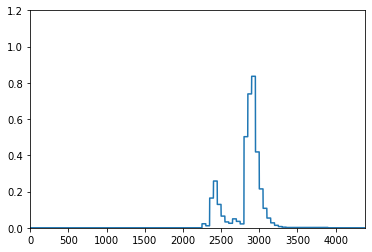

arctic_b0167.wav - class 0


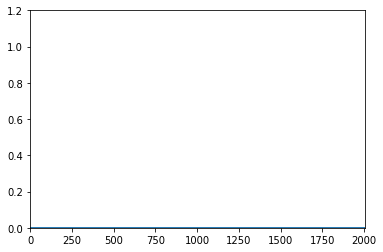

arctic_b0151.wav - class 0


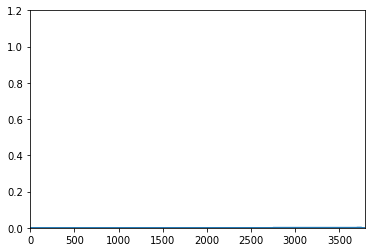

arctic_b0172.wav - class 0


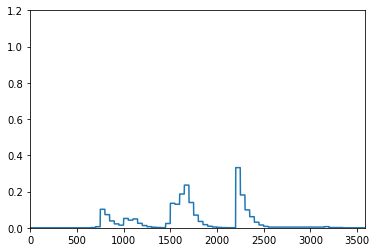

arctic_b0162.wav - class 0


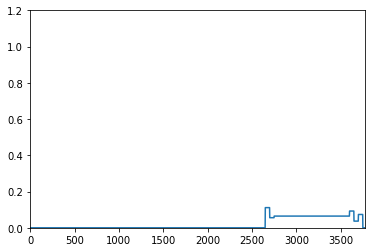

arctic_b0160.wav - class 0


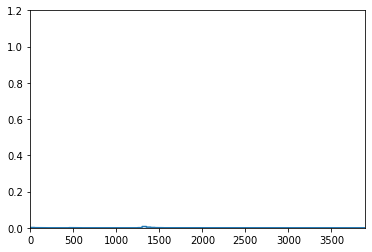

arctic_b0177.wav - class 0


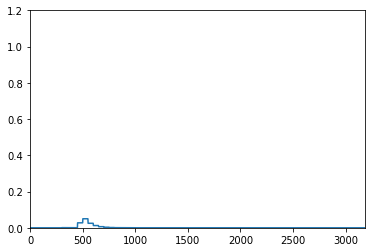

arctic_b0155.wav - class 0


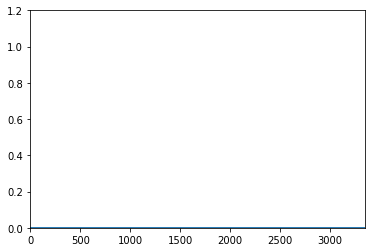

arctic_b0157.wav - class 0


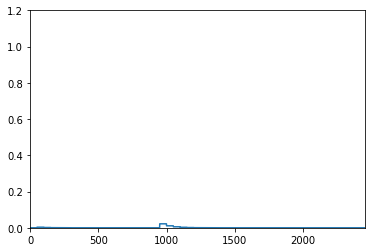

arctic_b0179.wav - class 0


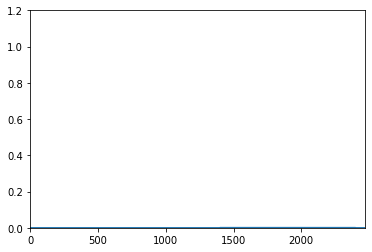

arctic_b0183.wav - class 0


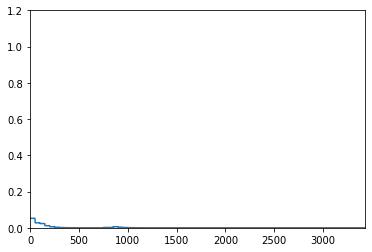

arctic_b0165.wav - class 0


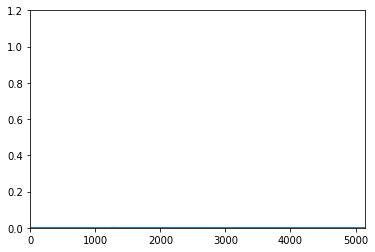

arctic_b0174.wav - class 0


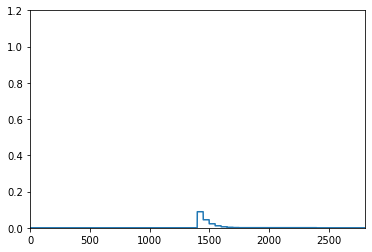

arctic_b0169.wav - class 0


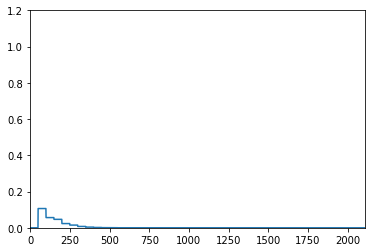

arctic_b0176.wav - class 0


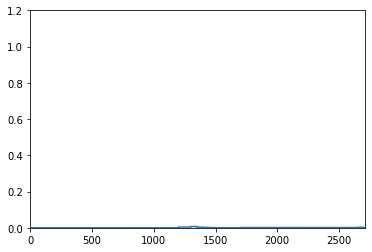

arctic_b0182.wav - class 0


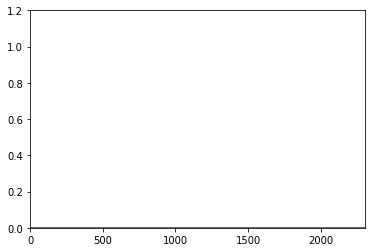

arctic_b0175.wav - class 0


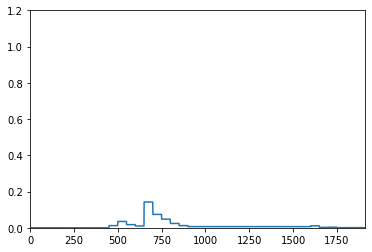

arctic_b0170.wav - class 0


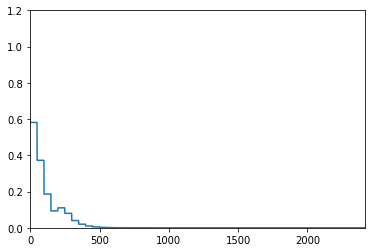

arctic_b0178.wav - class 0


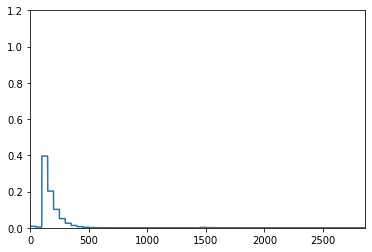

arctic_b0152.wav - class 0


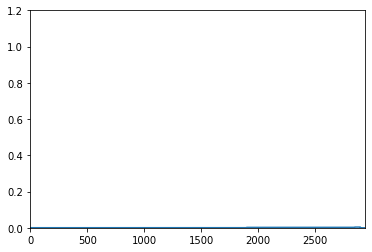

arctic_b0161.wav - class 0


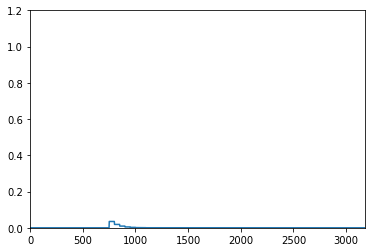

arctic_b0185.wav - class 0


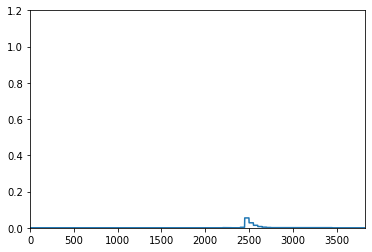

arctic_b0156.wav - class 0


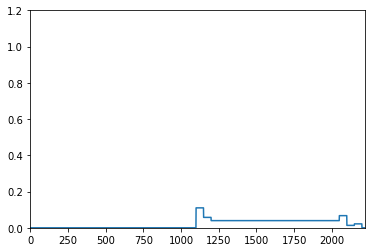

arctic_b0173.wav - class 0


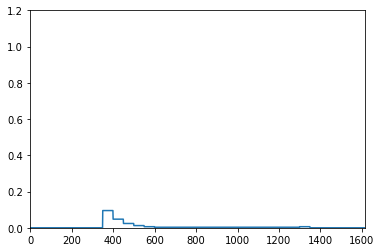

arctic_b0166.wav - class 0


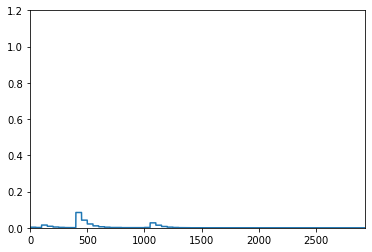

arctic_b0180.wav - class 0


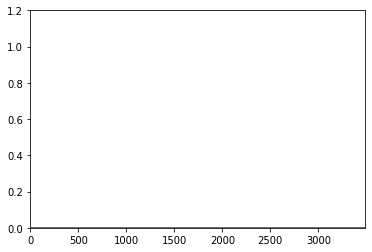

arctic_b0163.wav - class 0


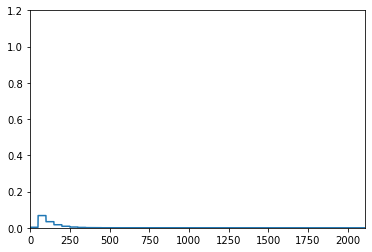

arctic_b0154.wav - class 0


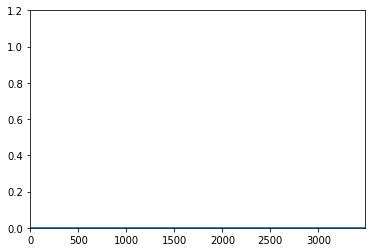

arctic_b0168.wav - class 0


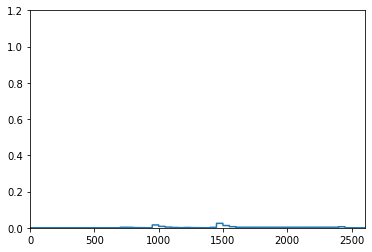

arctic_b0164.wav - class 0


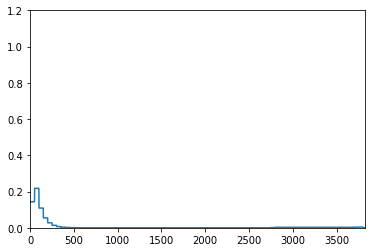

arctic_b0181.wav - class 0


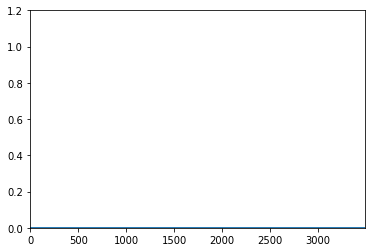

arctic_b0171.wav - class 0


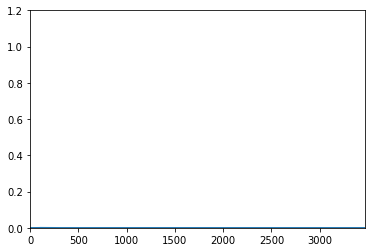

arctic_b0158.wav - class 0


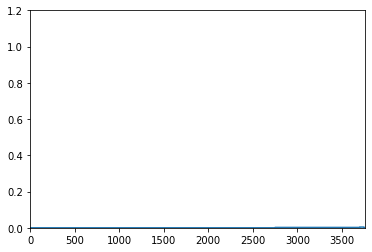

arctic_b0184.wav - class 0


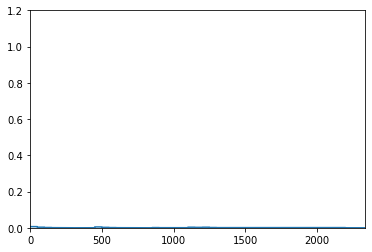

arctic_b0159.wav - class 0


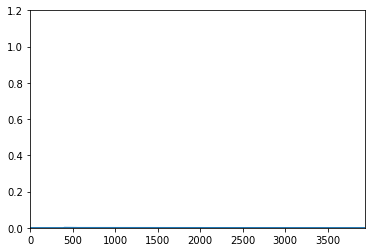

arctic_b0153.wav - class 0


In [86]:
for i, snd in enumerate(os.listdir(hard_test_path)):
    s = aud.from_file(hard_test_path + snd).resample(sample_rate_Hz=16000, sample_width=2, channels=1)
    predicted_values = np.zeros((len(s),))
    predicted_values = predicted_values.tolist()
    for j in range(0, len(s) - 1000, 50):
        sound = audiosegment_to_ndarray(s[j:j+1000])
        sound = np.expand_dims(sound, axis=0)
        pr_val = model_1.predict_proba(sound)[0]
        fill_array(predicted_values, pr_val, j)
    xlim((0, len(predicted_values)))
    ylim(0, 1.2)
    plt.plot(predicted_values)
    plt.show()
    print(snd + ' - class ' + str(make_pred(predicted_values)))

### For model 2 

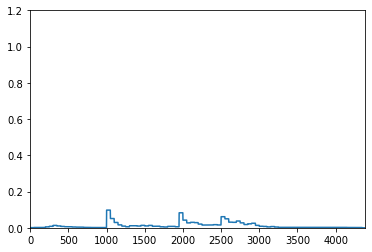

arctic_b0167.wav - class 0


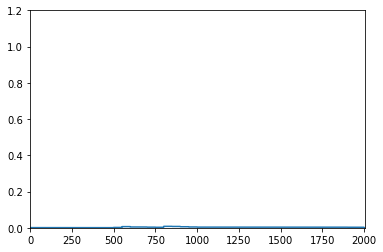

arctic_b0151.wav - class 0


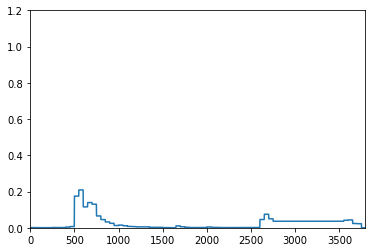

arctic_b0172.wav - class 0


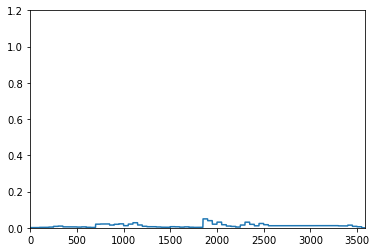

arctic_b0162.wav - class 0


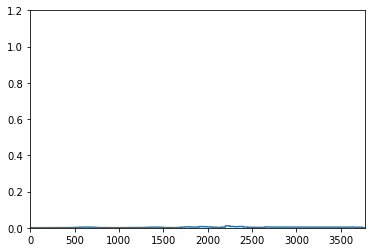

arctic_b0160.wav - class 0


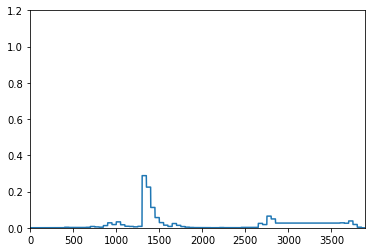

arctic_b0177.wav - class 0


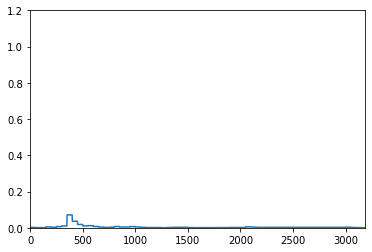

arctic_b0155.wav - class 0


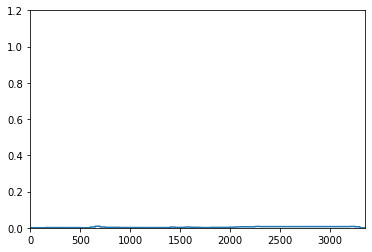

arctic_b0157.wav - class 0


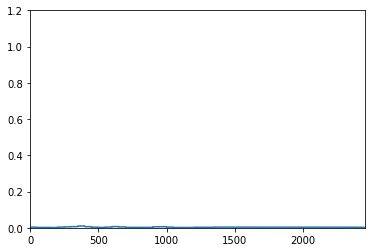

arctic_b0179.wav - class 0


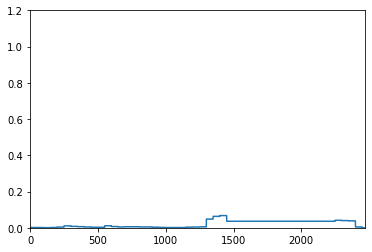

arctic_b0183.wav - class 0


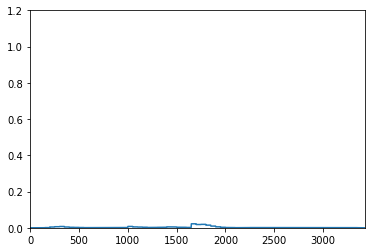

arctic_b0165.wav - class 0


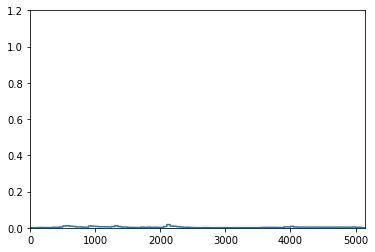

arctic_b0174.wav - class 0


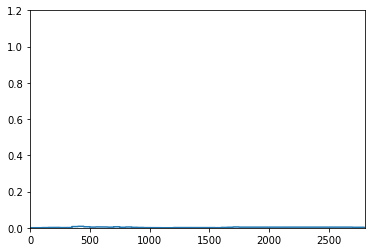

arctic_b0169.wav - class 0


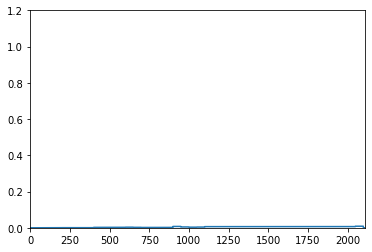

arctic_b0176.wav - class 0


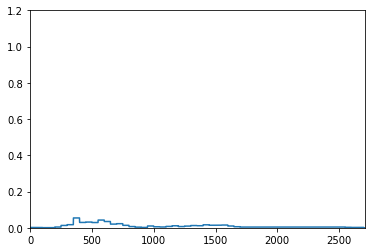

arctic_b0182.wav - class 0


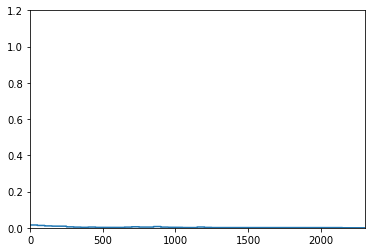

arctic_b0175.wav - class 0


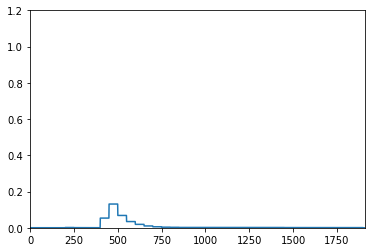

arctic_b0170.wav - class 0


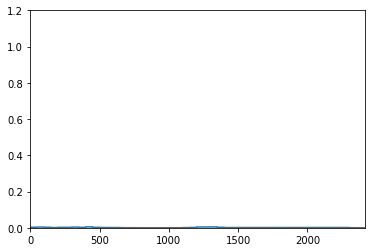

arctic_b0178.wav - class 0


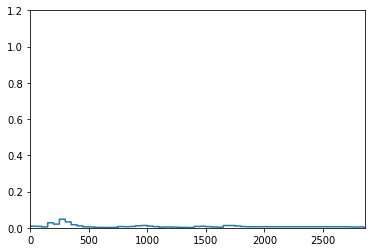

arctic_b0152.wav - class 0


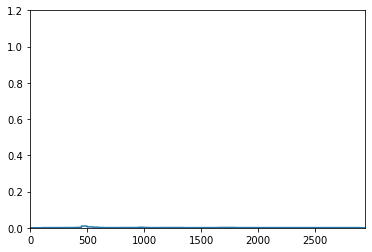

arctic_b0161.wav - class 0


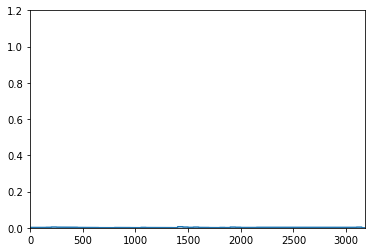

arctic_b0185.wav - class 0


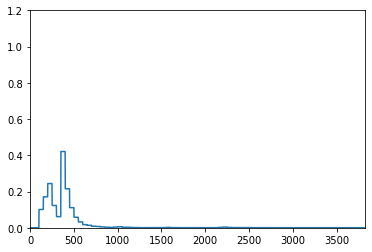

arctic_b0156.wav - class 0


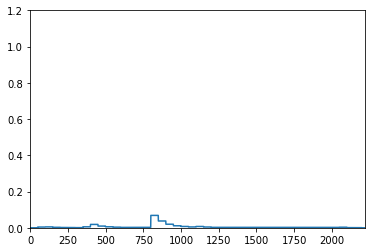

arctic_b0173.wav - class 0


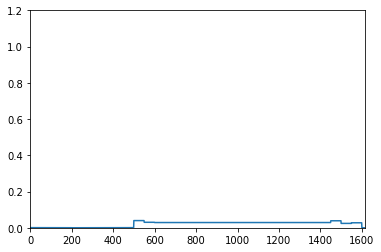

arctic_b0166.wav - class 0


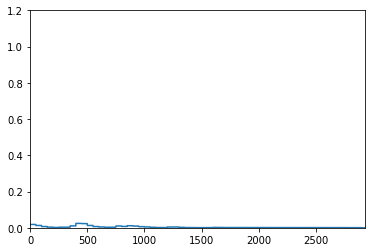

arctic_b0180.wav - class 0


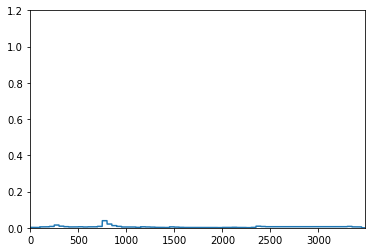

arctic_b0163.wav - class 0


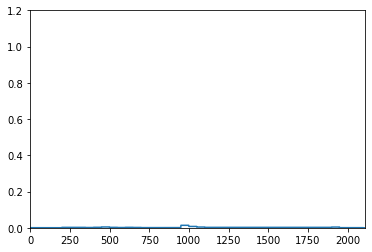

arctic_b0154.wav - class 0


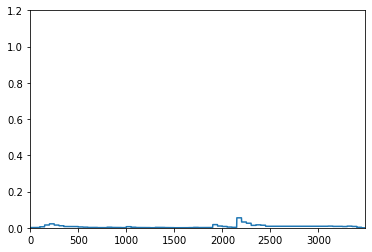

arctic_b0168.wav - class 0


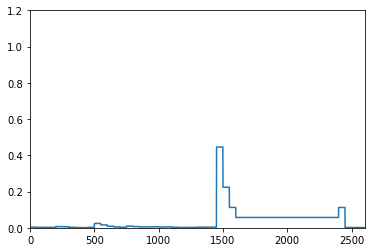

arctic_b0164.wav - class 0


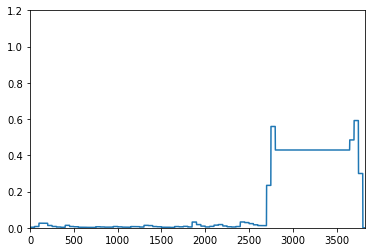

arctic_b0181.wav - class 0


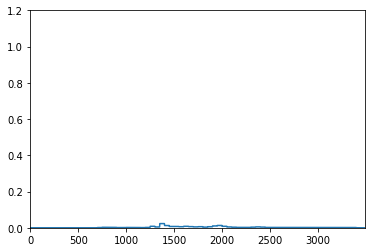

arctic_b0171.wav - class 0


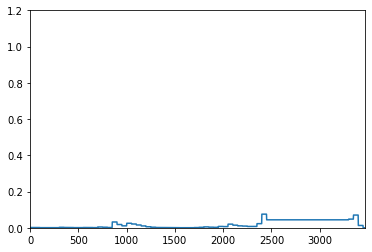

arctic_b0158.wav - class 0


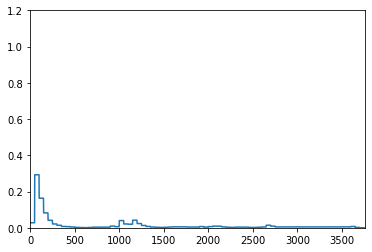

arctic_b0184.wav - class 0


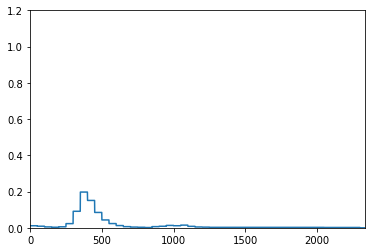

arctic_b0159.wav - class 0


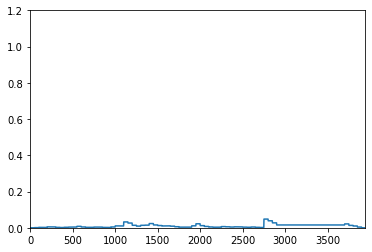

arctic_b0153.wav - class 0


In [87]:
for i, snd in enumerate(os.listdir(hard_test_path)):
    s = aud.from_file(hard_test_path + snd).resample(sample_rate_Hz=16000, sample_width=2, channels=1)
    predicted_values = np.zeros((len(s),))
    predicted_values = predicted_values.tolist()
    for j in range(0, len(s) - 1000, 50):
        sound = audiosegment_to_ndarray2(s[j:j+1000])
        sound = np.expand_dims(sound, axis=0)
        pr_val = model_2.predict(sound)[0]
        fill_array(predicted_values, pr_val, j)
    xlim((0, len(predicted_values)))
    ylim(0, 1.2)
    plt.plot(predicted_values)
    plt.show()
    print(snd + ' - class ' + str(make_pred(predicted_values)))